# SPOTIFY

- Spotify is a Swedish music streaming and media services provider where users can listen to their Favourite Artists, Songs and Albums.
- Founded in 2006, the company mainly provides an audio streaming platform, the "Spotify" platform, that offers DRM-restricted music and podcasts from record labels and media companies. 
- As a freemium service, basic features are free with advertisements or automatic music videos. 
- Additional features, such as offline listening and commercial-free listening, are offered via paid subscriptions.

## Spotify and trending music

- Spotify is one the biggest and most go-to platform anyone thinks of for music streaming. Artists and producers often release singles, albums, and even spotify exclusive releases through them. It is one of the largest collection of data with wealth in consumer taste and listening patterns that once mined would provide a better grasp of what makes a viral hit.

- Spotify also has a very robust recommendation system that is geared towards the listener's taste based on their previous tracks. However, I am interested in the other side of the coin.

- What trends could be mined so we might provide recommendations for the artists and producers of the industry as well.
- What are the current trends consumer likes? What would it take for a song to go viral? 
- What does the market currently want? 

- The plan is to analyze the top 50 of the past year 2021 to recognize patterns, see what factors contributes to the virality. 
- Then we will analyze the top hits from 2010-2019 database to confirm the findings and predict future trends. 
- By the end of this endeavor we should be able to provide a guideline or a at least a good starting point for those wanting to break into the industry. Let's jump into it!

# 1. DATA PROCESSING

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read the data

In [2]:
df = pd.read_csv("spotify_top50_2021.csv")

## View the data

In [3]:
df

id        artist_name                                         track_name  \
0    1     Olivia Rodrigo                                    drivers license   
1    2          Lil Nas X                     MONTERO (Call Me By Your Name)   
2    3      The Kid LAROI                          STAY (with Justin Bieber)   
3    4     Olivia Rodrigo                                           good 4 u   
4    5           Dua Lipa                          Levitating (feat. DaBaby)   
5    6      Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
6    7           Doja Cat                           Kiss Me More (feat. SZA)   
7    8         The Weeknd                                    Blinding Lights   
8    9      Glass Animals                                         Heat Waves   
9   10           Måneskin                                            Beggin'   
10  11        Masked Wolf                             Astronaut In The Ocean   
11  12          Bad Bunny                                             DÁKITI   
12  13          Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
13  14         Ed Sheeran                                         Bad Habits   
14  15         The Weeknd                                    Save Your Tears   
15  16                BTS                                             Butter   
16  17         Bruno Mars                                Leave The Door Open   
17  18     Olivia Rodrigo                                            deja vu   
18  19     Rauw Alejandro                                         Todo De Ti   
19  20           24kGoldn                             Mood (feat. iann dior)   
20  21             Tiësto                                       The Business   
21  22                BTS                                           Dynamite   
22  23          Bad Bunny                                           Yonaguni   
23  24       Harry Styles                                   Watermelon Sugar   
24  25              Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
25  26         Kali Uchis                                          telepatía   
26  27      The Kid LAROI                                        WITHOUT YOU   
27  28             Giveon                             Heartbreak Anniversary   
28  29     Olivia Rodrigo                                            traitor   
29  30            Farruko                                              Pepas   
30  31      Ariana Grande                                          positions   
31  32      Lewis Capaldi                                  Someone You Loved   
32  33        Myke Towers                                            Bandido   
33  34           Måneskin                              I WANNA BE YOUR SLAVE   
34  35             Polo G                                            RAPSTAR   
35  36          Bad Bunny                                 LA NOCHE DE ANOCHE   
36  37           Doja Cat                                            Streets   
37  38  The Neighbourhood                                    Sweater Weather   
38  39    Los Legendarios                                               Fiel   
39  40           Doja Cat                                       Need to Know   
40  41           Dua Lipa                                    Don't Start Now   
41  42     Internet Money           Lemonade (feat. Gunna Don Toliver & NAV)   
42  43           Doja Cat                                              Woman   
43  44    Duncan Laurence                                             Arcade   
44  45                SZA                                          Good Days   
45  46           J Balvin                                      Qué Más Pues?   
46  47         Joel Corry                          Head & Heart (feat. MNEK)   
47  48      Ariana Grande                                              34+35   
48  49         Tate McRae                                 you broke me first   
49  

## Print top 5 records

In [4]:
df.head()

id     artist_name                      track_name                track_id  \
0   1  Olivia Rodrigo                 drivers license  5wANPM4fQCJwkGd4rN57mH   
1   2       Lil Nas X  MONTERO (Call Me By Your Name)  1SC5rEoYDGUK4NfG82494W   
2   3   The Kid LAROI       STAY (with Justin Bieber)  5PjdY0CKGZdEuoNab3yDmX   
3   4  Olivia Rodrigo                        good 4 u  4ZtFanR9U6ndgddUvNcjcG   
4   5        Dua Lipa       Levitating (feat. DaBaby)  5nujrmhLynf4yMoMtj8AQF   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          92         0.561   0.431   10    -8.810     1       0.0578   
1          90         0.593   0.503    8    -6.725     0       0.2200   
2          92         0.591   0.764    1    -5.484     1       0.0483   
3          95         0.563   0.664    9    -5.044     1       0.1540   
4          89         0.702   0.825    6    -3.787     0       0.0601   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.76800          0.000014    0.1060    0.137  143.875       242013   
1       0.29300          0.000000    0.4050    0.710  178.781       137704   
2       0.03830          0.000000    0.1030    0.478  169.928       141806   
3       0.33500          0.000000    0.0849    0.688  166.928       178147   
4       0.00883          0.000000    0.0674    0.915  102.977       203064   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

## Print bottom 5 records

In [5]:
df.tail()

id      artist_name                 track_name                track_id  \
45  46         J Balvin              Qué Más Pues?  6D2TCm4nf5nxAcdGJ7w3QP   
46  47       Joel Corry  Head & Heart (feat. MNEK)  6cx06DFPPHchuUAcTxznu9   
47  48    Ariana Grande                      34+35  6Im9k8u9iIzKMrmV7BWtlF   
48  49       Tate McRae         you broke me first  45bE4HXI0AwGZXfZtMp8JR   
49  50  Sebastian Yatra             Pareja Del Año  2rCbl9naJYhaxjLsfx88uM   

    popularity  danceability  energy  key  loudness  mode  speechiness  \
45          79         0.903   0.817    8    -3.972     1       0.0950   
46          86         0.734   0.874    8    -3.158     1       0.0662   
47          85         0.830   0.585    0    -6.476     1       0.0940   
48          88         0.667   0.373    4    -9.389     1       0.0500   
49          86         0.715   0.622    4    -5.102     0       0.0460   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
45        0.0272          0.000311    0.2420   0.7320  102.014       217360   
46        0.1680          0.000011    0.0489   0.9050  122.953       166028   
47        0.2370          0.000000    0.2480   0.4850  109.978       173711   
48        0.7850          0.000000    0.0906   0.0823  124.148       169266   
49        0.1630          0.000000    0.0948   0.8080   80.015       195053   

    time_signature  
45               4  
46               4  
47               4  
48               4  
49               4

# To check how many rows and columns

In [6]:
df.shape

(50, 18)

## To print column names

In [7]:
df.columns

Index(['id', 'artist_name', 'track_name', 'track_id', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

# To check the datatypes of attributes

In [8]:
df.dtypes

id                    int64
artist_name          object
track_name           object
track_id             object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

# Reading specific rows

In [9]:
df[1:31]

id     artist_name                                         track_name  \
1    2       Lil Nas X                     MONTERO (Call Me By Your Name)   
2    3   The Kid LAROI                          STAY (with Justin Bieber)   
3    4  Olivia Rodrigo                                           good 4 u   
4    5        Dua Lipa                          Levitating (feat. DaBaby)   
5    6   Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
6    7        Doja Cat                           Kiss Me More (feat. SZA)   
7    8      The Weeknd                                    Blinding Lights   
8    9   Glass Animals                                         Heat Waves   
9   10        Måneskin                                            Beggin'   
10  11     Masked Wolf                             Astronaut In The Ocean   
11  12       Bad Bunny                                             DÁKITI   
12  13       Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
13  14      Ed Sheeran                                         Bad Habits   
14  15      The Weeknd                                    Save Your Tears   
15  16             BTS                                             Butter   
16  17      Bruno Mars                                Leave The Door Open   
17  18  Olivia Rodrigo                                            deja vu   
18  19  Rauw Alejandro                                         Todo De Ti   
19  20        24kGoldn                             Mood (feat. iann dior)   
20  21          Tiësto                                       The Business   
21  22             BTS                                           Dynamite   
22  23       Bad Bunny                                           Yonaguni   
23  24    Harry Styles                                   Watermelon Sugar   
24  25           Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
25  26      Kali Uchis                                          telepatía   
26  27   The Kid LAROI                                        WITHOUT YOU   
27  28          Giveon                             Heartbreak Anniversary   
28  29  Olivia Rodrigo                                            traitor   
29  30         Farruko                                              Pepas   
30  31   Ariana Grande                                          positions   

                  track_id  popularity  danceability  energy  key  loudness  \
1   1SC5rEoYDGUK4NfG82494W          90         0.593   0.503    8    -6.725   
2   5PjdY0CKGZdEuoNab3yDmX          92         0.591   0.764    1    -5.484   
3   4ZtFanR9U6ndgddUvNcjcG          95         0.563   0.664    9    -5.044   
4   5nujrmhLynf4yMoMtj8AQF          89         0.702   0.825    6    -3.787   
5   4iJyoBOLtHqaGxP12qzhQI          90         0.677   0.696    0    -6.181   
6   3DarAbFujv6eYNliUTyqtz          88         0.764   0.705    8    -3.463   
7   0VjIjW4GlUZAMYd2vXMi3b          93         0.514   0.730    1    -5.934   
8   02MWAaffLxlfxAUY7c5dvx          94         0.761   0.525   11    -6.900   
9   3Wrjm47oTz2sjIgck11l5e          93         0.714   0.800   11    -4.808   
10  6E90gq0KO6FYZVOXx8kCcC          77         0.778   0.695    4    -6.865   
11  4MzXwWMhyBbmu6hOcLVD49          87         0.731   0.573    4   -10.059   
12  5Z9KJZvQzH6PFmb8SNkxuk          90         0.741   0.691   10    -7.395   
13  3rmo8F54jFF8OgYsqTxm5d          95         0.807   0.893   11    -3.745   
14  5QO79kh1waicV47BqGRL3g          90         0.680   0.826    0    -5.487   
15  2bgTY4UwhfBYhGT4HUYStN          71         0.759   0.459    8    -5.187   
16  7MAibcTli4IisCtbHKrGMh          86         0.586   0.616    5    -7.964   
17  6HU7h9RYOaPRFeh0R3UeAr          90         0.442   0.612    2    -7.222   
18  5RwV8BvLfX5injfqYodke9          69         0.780   0.719    3    -3.613   
19  4jPy3l0RUwlUI9T5XHBW2m          89         0.701   0.716    7    -3.671   
20  6f3Slt0GbA2bPZlz0aIFXN          

## To read specific rows with particular columns

In [10]:
df[1:21]["track_name"]

1             MONTERO (Call Me By Your Name)
2                  STAY (with Justin Bieber)
3                                   good 4 u
4                  Levitating (feat. DaBaby)
5     Peaches (feat. Daniel Caesar & Giveon)
6                   Kiss Me More (feat. SZA)
7                            Blinding Lights
8                                 Heat Waves
9                                    Beggin'
10                    Astronaut In The Ocean
11                                    DÁKITI
12         INDUSTRY BABY (feat. Jack Harlow)
13                                Bad Habits
14                           Save Your Tears
15                                    Butter
16                       Leave The Door Open
17                                   deja vu
18                                Todo De Ti
19                    Mood (feat. iann dior)
20                              The Business
Name: track_name, dtype: object

## Reading specific rows and columns

In [11]:
df.loc[[10,20,30,40,49],["energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence"]]

energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
10   0.695    4    -6.865     0       0.0913        0.1750            0.0000   
20   0.620    8    -7.079     0       0.2320        0.4140            0.0192   
30   0.802    0    -4.771     1       0.0878        0.4680            0.0000   
40   0.793   11    -4.521     0       0.0830        0.0123            0.0000   
49   0.622    4    -5.102     0       0.0460        0.1630            0.0000   

    liveness  valence  
10    0.1500    0.472  
20    0.1120    0.235  
30    0.0931    0.682  
40    0.0951    0.679  
49    0.0948    0.808

## Information of dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

## To print statistical information

In [13]:
df.describe()

id  popularity  danceability    energy        key   loudness  \
count  50.00000   50.000000     50.000000  50.00000  50.000000  50.000000   
mean   25.50000   86.800000      0.685720   0.64636   5.180000  -5.903920   
std    14.57738    6.266203      0.124987   0.14712   3.868713   2.036948   
min     1.00000   67.000000      0.380000   0.33900   0.000000 -11.639000   
25%    13.25000   85.250000      0.597750   0.54525   1.000000  -7.186250   
50%    25.50000   88.000000      0.714500   0.65650   5.500000  -5.485500   
75%    37.75000   90.000000      0.774500   0.76475   8.000000  -4.258500   
max    50.00000   95.000000      0.903000   0.89300  11.000000  -2.810000   

            mode  speechiness  acousticness  instrumentalness   liveness  \
count  50.000000    50.000000     50.000000         50.000000  50.000000   
mean    0.620000     0.081374      0.253811          0.001606   0.182292   
std     0.490314     0.057164      0.235345          0.006425   0.137799   
min     0.000000     0.028400      0.001460          0.000000   0.047600   
25%     0.000000     0.046125      0.040000          0.000000   0.093225   
50%     1.000000     0.063150      0.196000          0.000000   0.115000   
75%     1.000000     0.094300      0.405500          0.000024   0.246500   
max     1.000000     0.286000      0.827000          0.038200   0.688000   

         valence       tempo    duration_ms  time_signature  
count  50.000000   50.000000      50.000000       50.000000  
mean    0.528884  121.083860  197488.400000        3.960000  
std     0.232789   29.252206   34727.260592        0.197949  
min     0.082300   72.017000  132780.000000        3.000000  
25%     0.401500   98.655500  172400.500000        4.000000  
50%     0.518000  120.516500  198712.500000        4.000000  
75%     0.706250  138.532000  215597.000000        4.000000  
max     0.958000  180.917000  287120.000000        4.000000

## Correlation()

In [14]:
df.corr()

id  popularity  danceability    energy       key  \
id                1.000000   -0.231462      0.171220 -0.103420 -0.114533   
popularity       -0.231462    1.000000     -0.275659  0.085398 -0.006061   
danceability      0.171220   -0.275659      1.000000  0.424101  0.266594   
energy           -0.103420    0.085398      0.424101  1.000000  0.020071   
key              -0.114533   -0.006061      0.266594  0.020071  1.000000   
loudness         -0.007781    0.000690      0.466949  0.749475  0.026175   
mode              0.015704    0.240455     -0.194921 -0.165835 -0.296727   
speechiness      -0.046188   -0.039281      0.258465 -0.068540  0.119803   
acousticness      0.104926    0.068833     -0.524703 -0.675219 -0.133163   
instrumentalness  0.141411    0.066601      0.088759 -0.098496  0.300551   
liveness         -0.065445    0.165771     -0.231599  0.130796 -0.198790   
valence          -0.043711   -0.068797      0.360962  0.513768  0.119263   
tempo            -0.369088    0.209988     -0.185919  0.221239 -0.111567   
duration_ms       0.087073    0.106071     -0.104433  0.068041  0.164862   
time_signature   -0.148522    0.157949      0.387228  0.334776  0.036243   

                  loudness      mode  speechiness  acousticness  \
id               -0.007781  0.015704    -0.046188      0.104926   
popularity        0.000690  0.240455    -0.039281      0.068833   
danceability      0.466949 -0.194921     0.258465     -0.524703   
energy            0.749475 -0.165835    -0.068540     -0.675219   
key               0.026175 -0.296727     0.119803     -0.133163   
loudness          1.000000  0.068546    -0.009078     -0.629024   
mode              0.068546  1.000000     0.033207      0.086673   
speechiness      -0.009078  0.033207     1.000000     -0.005745   
acousticness     -0.629024  0.086673    -0.005745      1.000000   
instrumentalness -0.101044  0.044489     0.117197     -0.028664   
liveness         -0.099097 -0.070092    -0.015350      0.008522   
valence           0.579425 -0.148440    -0.049890     -0.608244   
tempo             0.142757  0.097850     0.044644     -0.101145   
duration_ms      -0.011897  0.099699    -0.267925      0.081368   
time_signature    0.445159  0.050465     0.074213     -0.369461   

                  instrumentalness  liveness   valence     tempo  duration_ms  \
id                        0.141411 -0.065445 -0.043711 -0.369088     0.087073   
popularity                0.066601  0.165771 -0.068797  0.209988     0.106071   
danceability              0.088759 -0.231599  0.360962 -0.185919    -0.104433   
energy                   -0.098496  0.130796  0.513768  0.221239     0.068041   
key                       0.300551 -0.198790  0.119263 -0.111567     0.164862   
loudness                 -0.101044 -0.099097  0.579425  0.142757    -0.011897   
mode                      0.044489 -0.070092 -0.148440  0.097850     0.099699   
speechiness               0.117197 -0.015350 -0.049890  0.044644    -0.267925   
acousticness             -0.028664  0.008522 -0.608244 -0.101145     0.081368   
instrumentalness          1.000000  0.067491 -0.275311 -0.135957     0.106881   
liveness                  0.067491  1.000000 -0.036094 -0.048327     0.131191   
valence                  -0.275311 -0.036094  1.000000  0.012656    -0.223437   
tempo                    -0.135957 -0.048327  0.012656  1.000000    -0.009601   
duration_ms               0.106881  0.131191 -0.223437 -0.009601     1.000000   
time_signature            0.031945 -0.061662  0.104418  0.285706     0.034019   

                  time_signature  
id                     -0.148522  
popularity              0.157949  
danceability            0.387228  
energy                  0.334776  
key                     0.036243  
loudness                0.445159  
mode                    0.050465  
speechiness             0.074213  
acousticness           -0.369461  
instrumentalness        0.031945  
liveness               -0.061662  
valence          

## Co-varience()

In [15]:
df.cov()

id    popularity  danceability      energy  \
id                  212.500000    -21.142857      0.311959   -0.221796   
popularity          -21.142857     39.265306     -0.215894    0.078727   
danceability          0.311959     -0.215894      0.015622    0.007798   
energy               -0.221796      0.078727      0.007798    0.021644   
key                  -6.459184     -0.146939      0.128909    0.011424   
loudness             -0.231041      0.008812      0.118881    0.224599   
mode                  0.112245      0.738776     -0.011945   -0.011962   
speechiness          -0.038489     -0.014071      0.001847   -0.000576   
acousticness          0.359971      0.101509     -0.015434   -0.023379   
instrumentalness      0.013244      0.002681      0.000071   -0.000093   
liveness             -0.131463      0.143139     -0.003989    0.002652   
valence              -0.148333     -0.100354      0.010502    0.017595   
tempo              -157.386561     38.490829     -0.679747    0.952119   
duration_ms       44079.040816  23081.918367   -453.286151  347.624159   
time_signature       -0.428571      0.195918      0.009580    0.009749   

                           key    loudness         mode  speechiness  \
id                   -6.459184   -0.231041     0.112245    -0.038489   
popularity           -0.146939    0.008812     0.738776    -0.014071   
danceability          0.128909    0.118881    -0.011945     0.001847   
energy                0.011424    0.224599    -0.011962    -0.000576   
key                  14.966939    0.206271    -0.562857     0.026495   
loudness              0.206271    4.149156     0.068460    -0.001057   
mode                 -0.562857    0.068460     0.240408     0.000931   
speechiness           0.026495   -0.001057     0.000931     0.003268   
acousticness         -0.121243   -0.301545     0.010001    -0.000077   
instrumentalness      0.007470   -0.001322     0.000140     0.000043   
liveness             -0.105976   -0.027815    -0.004736    -0.000121   
valence               0.107407    0.274751    -0.016943    -0.000664   
tempo               -12.625872    8.506220     1.403436     0.074652   
duration_ms       22149.130612 -841.565012  1697.604082  -531.870371   
time_signature        0.027755    0.179493     0.004898     0.000840   

                  acousticness  instrumentalness    liveness      valence  \
id                    0.359971          0.013244   -0.131463    -0.148333   
popularity            0.101509          0.002681    0.143139    -0.100354   
danceability         -0.015434          0.000071   -0.003989     0.010502   
energy               -0.023379         -0.000093    0.002652     0.017595   
key                  -0.121243          0.007470   -0.105976     0.107407   
loudness             -0.301545         -0.001322   -0.027815     0.274751   
mode                  0.010001          0.000140   -0.004736    -0.016943   
speechiness          -0.000077          0.000043   -0.000121    -0.000664   
acousticness          0.055387         -0.000043    0.000276    -0.033323   
instrumentalness     -0.000043          0.000041    0.000060    -0.000412   
liveness              0.000276          0.000060    0.018989    -0.001158   
valence              -0.033323         -0.000412   -0.001158     0.054191   
tempo                -0.696318         -0.025551   -0.194803     0.086183   
duration_ms         665.010669         23.846375  627.799054 -1806.288963   
time_signature       -0.017212          0.000041   -0.001682     0.004812   

                        tempo   duration_ms  time_signature  
id                -157.386561  4.407904e+04       -0.428571  
popularity          38.490829  2.308192e+04        0.195918  
danceability        -0.679747 -4.532862e+02        0.009580  
energy               0.952119  3.476242e+02        0.009749  
key                -12.625872  2.214913e+04        0.027755  
loudness             8.506220 -8.415650e+02        0.179493  
mode                 1.

## Overall count for dataset

In [16]:
df.count()

id                  50
artist_name         50
track_name          50
track_id            50
popularity          50
danceability        50
energy              50
key                 50
loudness            50
mode                50
speechiness         50
acousticness        50
instrumentalness    50
liveness            50
valence             50
tempo               50
duration_ms         50
time_signature      50
dtype: int64

## Print sample records of dataset

In [17]:
df.sample()

id    artist_name                              track_name  \
5   6  Justin Bieber  Peaches (feat. Daniel Caesar & Giveon)   

                 track_id  popularity  danceability  energy  key  loudness  \
5  4iJyoBOLtHqaGxP12qzhQI          90         0.677   0.696    0    -6.181   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
5     1        0.119         0.321               0.0      0.42    0.464   

   tempo  duration_ms  time_signature  
5  90.03       198082               4

In [18]:
df.sample(5)

id  artist_name                 track_name                track_id  \
4    5     Dua Lipa  Levitating (feat. DaBaby)  5nujrmhLynf4yMoMtj8AQF   
10  11  Masked Wolf     Astronaut In The Ocean  6E90gq0KO6FYZVOXx8kCcC   
13  14   Ed Sheeran                 Bad Habits  3rmo8F54jFF8OgYsqTxm5d   
25  26   Kali Uchis                  telepatía  6tDDoYIxWvMLTdKpjFkc1B   
33  34     Måneskin      I WANNA BE YOUR SLAVE  4pt5fDVTg5GhEvEtlz9dKk   

    popularity  danceability  energy  key  loudness  mode  speechiness  \
4           89         0.702   0.825    6    -3.787     0       0.0601   
10          77         0.778   0.695    4    -6.865     0       0.0913   
13          95         0.807   0.893   11    -3.745     0       0.0347   
25          87         0.653   0.524   11    -9.016     0       0.0502   
33          88         0.750   0.608    1    -4.008     1       0.0387   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
4        0.00883          0.000000    0.0674    0.915  102.977       203064   
10       0.17500          0.000000    0.1500    0.472  149.996       132780   
13       0.04510          0.000028    0.3660    0.537  126.011       230747   
25       0.11200          0.000000    0.2030    0.553   83.970       160191   
33       0.00165          0.000000    0.1780    0.958  132.507       173347   

    time_signature  
4                4  
10               4  
13               4  
25               4  
33               4

## nunique(): number of unique values

In [19]:
df.nunique()

id                  50
artist_name         35
track_name          50
track_id            50
popularity          19
danceability        49
energy              49
key                 12
loudness            50
mode                 2
speechiness         50
acousticness        49
instrumentalness    21
liveness            45
valence             48
tempo               50
duration_ms         50
time_signature       2
dtype: int64

## Count by using particular column names

In [20]:
df["track_id"].value_counts()

5wANPM4fQCJwkGd4rN57mH    1
2QjOHCTQ1Jl3zawyYOpxh6    1
3FAJ6O0NOHQV8Mc5Ri6ENp    1
5CZ40GBx1sQ9agT82CLQCT    1
2B4GHvToeLTOBB4QLzW3Ni    1
35mvY5S1H3J2QZyna3TFe0    1
7qEHsqek33rTcFNT9PFqLf    1
1xK1Gg9SxG8fy2Ya373oqb    1
4pt5fDVTg5GhEvEtlz9dKk    1
18vXApRmJSgQ6wG2ll9AOg    1
2XIc1pqjXV3Cr2BQUGNBck    1
60ynsPSSKe6O3sfwRnIBRf    1
7Bk0uXKk1uPT0XuQbpFzvs    1
1SC5rEoYDGUK4NfG82494W    1
3Vi5XqYrmQgOYBajMWSvCi    1
3PfIrDoz19wz7qK7tYeu62    1
7hxHWCCAIIxFLCzvDgnQHX    1
6Uj1ctrBOjOas8xZXGqKk4    1
1J14CdDAvBTE1AJYUOwl6C    1
3YJJjQPAbDT7mGpX3WtQ9A    1
6D2TCm4nf5nxAcdGJ7w3QP    1
6cx06DFPPHchuUAcTxznu9    1
6Im9k8u9iIzKMrmV7BWtlF    1
45bE4HXI0AwGZXfZtMp8JR    1
27OeeYzk6klgBh83TSvGMA    1
6tDDoYIxWvMLTdKpjFkc1B    1
4cG7HUWYHBV6R6tHn1gxrl    1
6UelLqGlWMcVH1E5c4H7lY    1
5PjdY0CKGZdEuoNab3yDmX    1
4ZtFanR9U6ndgddUvNcjcG    1
5nujrmhLynf4yMoMtj8AQF    1
4iJyoBOLtHqaGxP12qzhQI    1
3DarAbFujv6eYNliUTyqtz    1
0VjIjW4GlUZAMYd2vXMi3b    1
02MWAaffLxlfxAUY7c5dvx    1
3Wrjm47oTz2sjIgck11l

In [21]:
df["loudness"].value_counts()

-8.810     1
-2.810     1
-8.964     1
-7.885     1
-3.955     1
-4.771     1
-5.679     1
-4.637     1
-4.008     1
-6.862     1
-4.892     1
-8.433     1
-4.407     1
-6.725     1
-6.509     1
-4.521     1
-6.142     1
-4.175     1
-11.639    1
-8.370     1
-3.972     1
-3.158     1
-6.476     1
-9.389     1
-7.357     1
-9.016     1
-3.424     1
-4.209     1
-5.484     1
-5.044     1
-3.787     1
-6.181     1
-3.463     1
-5.934     1
-6.900     1
-4.808     1
-6.865     1
-10.059    1
-7.395     1
-3.745     1
-5.487     1
-5.187     1
-7.964     1
-7.222     1
-3.613     1
-3.671     1
-7.079     1
-4.410     1
-4.601     1
-5.102     1
Name: loudness, dtype: int64

## Checking the unique values in each columns

In [22]:
df["track_id"].unique()

array(['5wANPM4fQCJwkGd4rN57mH', '1SC5rEoYDGUK4NfG82494W',
       '5PjdY0CKGZdEuoNab3yDmX', '4ZtFanR9U6ndgddUvNcjcG',
       '5nujrmhLynf4yMoMtj8AQF', '4iJyoBOLtHqaGxP12qzhQI',
       '3DarAbFujv6eYNliUTyqtz', '0VjIjW4GlUZAMYd2vXMi3b',
       '02MWAaffLxlfxAUY7c5dvx', '3Wrjm47oTz2sjIgck11l5e',
       '6E90gq0KO6FYZVOXx8kCcC', '4MzXwWMhyBbmu6hOcLVD49',
       '5Z9KJZvQzH6PFmb8SNkxuk', '3rmo8F54jFF8OgYsqTxm5d',
       '5QO79kh1waicV47BqGRL3g', '2bgTY4UwhfBYhGT4HUYStN',
       '7MAibcTli4IisCtbHKrGMh', '6HU7h9RYOaPRFeh0R3UeAr',
       '5RwV8BvLfX5injfqYodke9', '4jPy3l0RUwlUI9T5XHBW2m',
       '6f3Slt0GbA2bPZlz0aIFXN', '4saklk6nie3yiGePpBwUoc',
       '2JPLbjOn0wPCngEot2STUS', '6UelLqGlWMcVH1E5c4H7lY',
       '4cG7HUWYHBV6R6tHn1gxrl', '6tDDoYIxWvMLTdKpjFkc1B',
       '27OeeYzk6klgBh83TSvGMA', '3FAJ6O0NOHQV8Mc5Ri6ENp',
       '5CZ40GBx1sQ9agT82CLQCT', '2B4GHvToeLTOBB4QLzW3Ni',
       '35mvY5S1H3J2QZyna3TFe0', '7qEHsqek33rTcFNT9PFqLf',
       '1xK1Gg9SxG8fy2Ya373oqb', '4pt5fDVTg5GhEvEtlz9dKk

In [23]:
df["loudness"].unique()

array([ -8.81 ,  -6.725,  -5.484,  -5.044,  -3.787,  -6.181,  -3.463,
        -5.934,  -6.9  ,  -4.808,  -6.865, -10.059,  -7.395,  -3.745,
        -5.487,  -5.187,  -7.964,  -7.222,  -3.613,  -3.671,  -7.079,
        -4.41 ,  -4.601,  -4.209,  -3.424,  -9.016,  -7.357,  -8.964,
        -7.885,  -3.955,  -4.771,  -5.679,  -4.637,  -4.008,  -6.862,
        -4.892,  -8.433,  -2.81 ,  -4.407,  -6.509,  -4.521,  -6.142,
        -4.175, -11.639,  -8.37 ,  -3.972,  -3.158,  -6.476,  -9.389,
        -5.102])

# 2. DATA CLEANING

## To check is there any missing values

In [24]:
df.isnull()

id  artist_name  track_name  track_id  popularity  danceability  \
0   False        False       False     False       False         False   
1   False        False       False     False       False         False   
2   False        False       False     False       False         False   
3   False        False       False     False       False         False   
4   False        False       False     False       False         False   
5   False        False       False     False       False         False   
6   False        False       False     False       False         False   
7   False        False       False     False       False         False   
8   False        False       False     False       False         False   
9   False        False       False     False       False         False   
10  False        False       False     False       False         False   
11  False        False       False     False       False         False   
12  False        False       False     False       False         False   
13  False        False       False     False       False         False   
14  False        False       False     False       False         False   
15  False        False       False     False       False         False   
16  False        False       False     False       False         False   
17  False        False       False     False       False         False   
18  False        False       False     False       False         False   
19  False        False       False     False       False         False   
20  False        False       False     False       False         False   
21  False        False       False     False       False         False   
22  False        False       False     False       False         False   
23  False        False       False     False       False         False   
24  False        False       False     False       False         False   
25  False        False       False     False       False         False   
26  False        False       False     False       False         False   
27  False        False       False     False       False         False   
28  False        False       False     False       False         False   
29  False        False       False     False       False         False   
30  False        False       False     False       False         False   
31  False        False       False     False       False         False   
32  False        False       False     False       False         False   
33  False        False       False     False       False         False   
34  False        False       False     False       False         False   
35  False        False       False     False       False         False   
36  False        False       False     False       False         False   
37  False        False       False     False       False         False   
38  False        False       False     False       False         False   
39  False        False       False     False       False         False   
40  False        False       False     False       False         False   
41  False        False       False     False       False         False   
42  False        False       False     False       False         False   
43  False        False       False     False       False         False   
44  False        False       False     False       False         False   
45  False        False       False     False       False         False   
46  False        False       False     False       False         False   
47  False        False       False     False       False         False   
48  False        False       False     False       False         False   
49  False        False       False     False       False         False   

    energy    key  loudness   mode  speechiness  acousticness  \
0    False  False     False  False        False         False   
1    False  False     False  False        False         False   
2    False  False     False  False   

In [25]:
df.notnull()

id  artist_name  track_name  track_id  popularity  danceability  energy  \
0   True         True        True      True        True          True    True   
1   True         True        True      True        True          True    True   
2   True         True        True      True        True          True    True   
3   True         True        True      True        True          True    True   
4   True         True        True      True        True          True    True   
5   True         True        True      True        True          True    True   
6   True         True        True      True        True          True    True   
7   True         True        True      True        True          True    True   
8   True         True        True      True        True          True    True   
9   True         True        True      True        True          True    True   
10  True         True        True      True        True          True    True   
11  True         True        True      True        True          True    True   
12  True         True        True      True        True          True    True   
13  True         True        True      True        True          True    True   
14  True         True        True      True        True          True    True   
15  True         True        True      True        True          True    True   
16  True         True        True      True        True          True    True   
17  True         True        True      True        True          True    True   
18  True         True        True      True        True          True    True   
19  True         True        True      True        True          True    True   
20  True         True        True      True        True          True    True   
21  True         True        True      True        True          True    True   
22  True         True        True      True        True          True    True   
23  True         True        True      True        True          True    True   
24  True         True        True      True        True          True    True   
25  True         True        True      True        True          True    True   
26  True         True        True      True        True          True    True   
27  True         True        True      True        True          True    True   
28  True         True        True      True        True          True    True   
29  True         True        True      True        True          True    True   
30  True         True        True      True        True          True    True   
31  True         True        True      True        True          True    True   
32  True         True        True      True        True          True    True   
33  True         True        True      True        True          True    True   
34  True         True        True      True        True          True    True   
35  True         True        True      True        True          True    True   
36  True         True        True      True        True          True    True   
37  True         True        True      True        True          True    True   
38  True         True        True      True        True          True    True   
39  True         True        True      True        True          True    True   
40  True         True        True      True        True          True    True   
41  True         True        True      True        True          True    True   
42  True         True        True      True        True          True    True   
43  True         True        True      True        True          True    True   
44  True         True        True      True        True          True    True   
45  True         True        True      True        True          True    True   
46  True         True        True      True        True          True    True   
47  True         True        True      True        True          True    True   
48  True         True        True    

## Using isnull().any()

In [26]:
df.isnull().any()

id                  False
artist_name         False
track_name          False
track_id            False
popularity          False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
dtype: bool

## Using isnull().sum()

In [27]:
df.isnull().sum()

id                  0
artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

## Using isnull.any().sum()

In [28]:
df.isnull().any().sum()

0

## To check is there any duplicated value

In [29]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [30]:
df.duplicated().sum()

0

In [31]:
df.duplicated().count()

50

## Droping the duplicates

In [32]:
df.drop_duplicates()

id        artist_name                                         track_name  \
0    1     Olivia Rodrigo                                    drivers license   
1    2          Lil Nas X                     MONTERO (Call Me By Your Name)   
2    3      The Kid LAROI                          STAY (with Justin Bieber)   
3    4     Olivia Rodrigo                                           good 4 u   
4    5           Dua Lipa                          Levitating (feat. DaBaby)   
5    6      Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
6    7           Doja Cat                           Kiss Me More (feat. SZA)   
7    8         The Weeknd                                    Blinding Lights   
8    9      Glass Animals                                         Heat Waves   
9   10           Måneskin                                            Beggin'   
10  11        Masked Wolf                             Astronaut In The Ocean   
11  12          Bad Bunny                                             DÁKITI   
12  13          Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
13  14         Ed Sheeran                                         Bad Habits   
14  15         The Weeknd                                    Save Your Tears   
15  16                BTS                                             Butter   
16  17         Bruno Mars                                Leave The Door Open   
17  18     Olivia Rodrigo                                            deja vu   
18  19     Rauw Alejandro                                         Todo De Ti   
19  20           24kGoldn                             Mood (feat. iann dior)   
20  21             Tiësto                                       The Business   
21  22                BTS                                           Dynamite   
22  23          Bad Bunny                                           Yonaguni   
23  24       Harry Styles                                   Watermelon Sugar   
24  25              Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
25  26         Kali Uchis                                          telepatía   
26  27      The Kid LAROI                                        WITHOUT YOU   
27  28             Giveon                             Heartbreak Anniversary   
28  29     Olivia Rodrigo                                            traitor   
29  30            Farruko                                              Pepas   
30  31      Ariana Grande                                          positions   
31  32      Lewis Capaldi                                  Someone You Loved   
32  33        Myke Towers                                            Bandido   
33  34           Måneskin                              I WANNA BE YOUR SLAVE   
34  35             Polo G                                            RAPSTAR   
35  36          Bad Bunny                                 LA NOCHE DE ANOCHE   
36  37           Doja Cat                                            Streets   
37  38  The Neighbourhood                                    Sweater Weather   
38  39    Los Legendarios                                               Fiel   
39  40           Doja Cat                                       Need to Know   
40  41           Dua Lipa                                    Don't Start Now   
41  42     Internet Money           Lemonade (feat. Gunna Don Toliver & NAV)   
42  43           Doja Cat                                              Woman   
43  44    Duncan Laurence                                             Arcade   
44  45                SZA                                          Good Days   
45  46           J Balvin                                      Qué Más Pues?   
46  47         Joel Corry                          Head & Heart (feat. MNEK)   
47  48      Ariana Grande                                              34+35   
48  49         Tate McRae                                 you broke me first   
49  

## Fillna values

In [33]:
df.fillna(0)

id        artist_name                                         track_name  \
0    1     Olivia Rodrigo                                    drivers license   
1    2          Lil Nas X                     MONTERO (Call Me By Your Name)   
2    3      The Kid LAROI                          STAY (with Justin Bieber)   
3    4     Olivia Rodrigo                                           good 4 u   
4    5           Dua Lipa                          Levitating (feat. DaBaby)   
5    6      Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
6    7           Doja Cat                           Kiss Me More (feat. SZA)   
7    8         The Weeknd                                    Blinding Lights   
8    9      Glass Animals                                         Heat Waves   
9   10           Måneskin                                            Beggin'   
10  11        Masked Wolf                             Astronaut In The Ocean   
11  12          Bad Bunny                                             DÁKITI   
12  13          Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
13  14         Ed Sheeran                                         Bad Habits   
14  15         The Weeknd                                    Save Your Tears   
15  16                BTS                                             Butter   
16  17         Bruno Mars                                Leave The Door Open   
17  18     Olivia Rodrigo                                            deja vu   
18  19     Rauw Alejandro                                         Todo De Ti   
19  20           24kGoldn                             Mood (feat. iann dior)   
20  21             Tiësto                                       The Business   
21  22                BTS                                           Dynamite   
22  23          Bad Bunny                                           Yonaguni   
23  24       Harry Styles                                   Watermelon Sugar   
24  25              Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
25  26         Kali Uchis                                          telepatía   
26  27      The Kid LAROI                                        WITHOUT YOU   
27  28             Giveon                             Heartbreak Anniversary   
28  29     Olivia Rodrigo                                            traitor   
29  30            Farruko                                              Pepas   
30  31      Ariana Grande                                          positions   
31  32      Lewis Capaldi                                  Someone You Loved   
32  33        Myke Towers                                            Bandido   
33  34           Måneskin                              I WANNA BE YOUR SLAVE   
34  35             Polo G                                            RAPSTAR   
35  36          Bad Bunny                                 LA NOCHE DE ANOCHE   
36  37           Doja Cat                                            Streets   
37  38  The Neighbourhood                                    Sweater Weather   
38  39    Los Legendarios                                               Fiel   
39  40           Doja Cat                                       Need to Know   
40  41           Dua Lipa                                    Don't Start Now   
41  42     Internet Money           Lemonade (feat. Gunna Don Toliver & NAV)   
42  43           Doja Cat                                              Woman   
43  44    Duncan Laurence                                             Arcade   
44  45                SZA                                          Good Days   
45  46           J Balvin                                      Qué Más Pues?   
46  47         Joel Corry                          Head & Heart (feat. MNEK)   
47  48      Ariana Grande                                              34+35   
48  49         Tate McRae                                 you broke me first   
49  

## Data Frame methods

In [34]:
# slicing of row by using iloc[]:

df.iloc[10:20]  

id     artist_name                         track_name  \
10  11     Masked Wolf             Astronaut In The Ocean   
11  12       Bad Bunny                             DÁKITI   
12  13       Lil Nas X  INDUSTRY BABY (feat. Jack Harlow)   
13  14      Ed Sheeran                         Bad Habits   
14  15      The Weeknd                    Save Your Tears   
15  16             BTS                             Butter   
16  17      Bruno Mars                Leave The Door Open   
17  18  Olivia Rodrigo                            deja vu   
18  19  Rauw Alejandro                         Todo De Ti   
19  20        24kGoldn             Mood (feat. iann dior)   

                  track_id  popularity  danceability  energy  key  loudness  \
10  6E90gq0KO6FYZVOXx8kCcC          77         0.778   0.695    4    -6.865   
11  4MzXwWMhyBbmu6hOcLVD49          87         0.731   0.573    4   -10.059   
12  5Z9KJZvQzH6PFmb8SNkxuk          90         0.741   0.691   10    -7.395   
13  3rmo8F54jFF8OgYsqTxm5d          95         0.807   0.893   11    -3.745   
14  5QO79kh1waicV47BqGRL3g          90         0.680   0.826    0    -5.487   
15  2bgTY4UwhfBYhGT4HUYStN          71         0.759   0.459    8    -5.187   
16  7MAibcTli4IisCtbHKrGMh          86         0.586   0.616    5    -7.964   
17  6HU7h9RYOaPRFeh0R3UeAr          90         0.442   0.612    2    -7.222   
18  5RwV8BvLfX5injfqYodke9          69         0.780   0.719    3    -3.613   
19  4jPy3l0RUwlUI9T5XHBW2m          89         0.701   0.716    7    -3.671   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
10     0       0.0913       0.17500          0.000000    0.1500    0.472   
11     0       0.0544       0.40100          0.000052    0.1130    0.145   
12     0       0.0672       0.02210          0.000000    0.0476    0.892   
13     0       0.0347       0.04510          0.000028    0.3660    0.537   
14     1       0.0309       0.02120          0.000012    0.5430    0.644   
15     1       0.0948       0.00323          0.000000    0.0906    0.695   
16     1       0.0324       0.18200          0.000000    0.0927    0.719   
17     1       0.1120       0.58400          0.000006    0.3700    0.178   
18     0       0.0506       0.30200          0.000196    0.0931    0.336   
19     0       0.0361       0.17400          0.000000    0.3240    0.732   

      tempo  duration_ms  time_signature  
10  149.996       132780               4  
11  109.928       205090               4  
12  150.087       212353               4  
13  126.011       230747               4  
14  118.051       215627               4  
15  109.997       164442               4  
16  148.088       242096               4  
17  180.917       215507               4  
18  127.962       199604               4  
19   91.007       140533               4

## Sorting by columns in descending order

In [35]:
df.sort_values(ascending=False, by=["speechiness"])

id        artist_name                                         track_name  \
35  36          Bad Bunny                                 LA NOCHE DE ANOCHE   
34  35             Polo G                                            RAPSTAR   
20  21             Tiësto                                       The Business   
1    2          Lil Nas X                     MONTERO (Call Me By Your Name)   
3    4     Olivia Rodrigo                                           good 4 u   
24  25              Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
5    6      Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
22  23          Bad Bunny                                           Yonaguni   
17  18     Olivia Rodrigo                                            deja vu   
21  22                BTS                                           Dynamite   
45  46           J Balvin                                      Qué Más Pues?   
15  16                BTS                                             Butter   
8    9      Glass Animals                                         Heat Waves   
47  48      Ariana Grande                                              34+35   
10  11        Masked Wolf                             Astronaut In The Ocean   
32  33        Myke Towers                                            Bandido   
30  31      Ariana Grande                                          positions   
42  43           Doja Cat                                              Woman   
36  37           Doja Cat                                            Streets   
40  41           Dua Lipa                                    Don't Start Now   
27  28             Giveon                             Heartbreak Anniversary   
41  42     Internet Money           Lemonade (feat. Gunna Don Toliver & NAV)   
39  40           Doja Cat                                       Need to Know   
12  13          Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
46  47         Joel Corry                          Head & Heart (feat. MNEK)   
4    5           Dua Lipa                          Levitating (feat. DaBaby)   
38  39    Los Legendarios                                               Fiel   
7    8         The Weeknd                                    Blinding Lights   
44  45                SZA                                          Good Days   
0    1     Olivia Rodrigo                                    drivers license   
11  12          Bad Bunny                                             DÁKITI   
18  19     Rauw Alejandro                                         Todo De Ti   
9   10           Måneskin                                            Beggin'   
25  26         Kali Uchis                                          telepatía   
48  49         Tate McRae                                 you broke me first   
2    3      The Kid LAROI                          STAY (with Justin Bieber)   
23  24       Harry Styles                                   Watermelon Sugar   
49  50    Sebastian Yatra                                     Pareja Del Año   
43  44    Duncan Laurence                                             Arcade   
33  34           Måneskin                              I WANNA BE YOUR SLAVE   
19  20           24kGoldn                             Mood (feat. iann dior)   
13  14         Ed Sheeran                                         Bad Habits   
29  30            Farruko                                              Pepas   
28  29     Olivia Rodrigo                                            traitor   
37  38  The Neighbourhood                                    Sweater Weather   
16  17         Bruno Mars                                Leave The Door Open   
31  32      Lewis Capaldi                                  Someone You Loved   
14  15         The Weeknd                                    Save Your Tears   
26  27      The Kid LAROI                                        WITHOUT YOU   
6   

## Sorting the data columns in ascending order

In [36]:
df.sort_values(ascending=True, by=["loudness"])

id        artist_name                                         track_name  \
43  44    Duncan Laurence                                             Arcade   
11  12          Bad Bunny                                             DÁKITI   
48  49         Tate McRae                                 you broke me first   
25  26         Kali Uchis                                          telepatía   
27  28             Giveon                             Heartbreak Anniversary   
0    1     Olivia Rodrigo                                    drivers license   
36  37           Doja Cat                                            Streets   
44  45                SZA                                          Good Days   
16  17         Bruno Mars                                Leave The Door Open   
28  29     Olivia Rodrigo                                            traitor   
12  13          Lil Nas X                  INDUSTRY BABY (feat. Jack Harlow)   
26  27      The Kid LAROI                                        WITHOUT YOU   
17  18     Olivia Rodrigo                                            deja vu   
20  21             Tiësto                                       The Business   
8    9      Glass Animals                                         Heat Waves   
10  11        Masked Wolf                             Astronaut In The Ocean   
34  35             Polo G                                            RAPSTAR   
1    2          Lil Nas X                     MONTERO (Call Me By Your Name)   
39  40           Doja Cat                                       Need to Know   
47  48      Ariana Grande                                              34+35   
5    6      Justin Bieber             Peaches (feat. Daniel Caesar & Giveon)   
41  42     Internet Money           Lemonade (feat. Gunna Don Toliver & NAV)   
7    8         The Weeknd                                    Blinding Lights   
31  32      Lewis Capaldi                                  Someone You Loved   
14  15         The Weeknd                                    Save Your Tears   
2    3      The Kid LAROI                          STAY (with Justin Bieber)   
15  16                BTS                                             Butter   
49  50    Sebastian Yatra                                     Pareja Del Año   
3    4     Olivia Rodrigo                                           good 4 u   
35  36          Bad Bunny                                 LA NOCHE DE ANOCHE   
9   10           Måneskin                                            Beggin'   
30  31      Ariana Grande                                          positions   
32  33        Myke Towers                                            Bandido   
22  23          Bad Bunny                                           Yonaguni   
40  41           Dua Lipa                                    Don't Start Now   
21  22                BTS                                           Dynamite   
38  39    Los Legendarios                                               Fiel   
23  24       Harry Styles                                   Watermelon Sugar   
42  43           Doja Cat                                              Woman   
33  34           Måneskin                              I WANNA BE YOUR SLAVE   
45  46           J Balvin                                      Qué Más Pues?   
29  30            Farruko                                              Pepas   
4    5           Dua Lipa                          Levitating (feat. DaBaby)   
13  14         Ed Sheeran                                         Bad Habits   
19  20           24kGoldn                             Mood (feat. iann dior)   
18  19     Rauw Alejandro                                         Todo De Ti   
6    7           Doja Cat                           Kiss Me More (feat. SZA)   
24  25              Riton  Friday (feat. Mufasa & Hypeman) - Dopamine Re-...   
46  47         Joel Corry                          Head & Heart (feat. MNEK)   
37  

# 3. Exploratory Data Analysis

In [37]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [38]:
df[cat].head()

artist_name                      track_name                track_id
0  Olivia Rodrigo                 drivers license  5wANPM4fQCJwkGd4rN57mH
1       Lil Nas X  MONTERO (Call Me By Your Name)  1SC5rEoYDGUK4NfG82494W
2   The Kid LAROI       STAY (with Justin Bieber)  5PjdY0CKGZdEuoNab3yDmX
3  Olivia Rodrigo                        good 4 u  4ZtFanR9U6ndgddUvNcjcG
4        Dua Lipa       Levitating (feat. DaBaby)  5nujrmhLynf4yMoMtj8AQF

In [39]:
df[num].head()

id  popularity  danceability  energy  key  loudness  mode  speechiness  \
0   1          92         0.561   0.431   10    -8.810     1       0.0578   
1   2          90         0.593   0.503    8    -6.725     0       0.2200   
2   3          92         0.591   0.764    1    -5.484     1       0.0483   
3   4          95         0.563   0.664    9    -5.044     1       0.1540   
4   5          89         0.702   0.825    6    -3.787     0       0.0601   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.76800          0.000014    0.1060    0.137  143.875       242013   
1       0.29300          0.000000    0.4050    0.710  178.781       137704   
2       0.03830          0.000000    0.1030    0.478  169.928       141806   
3       0.33500          0.000000    0.0849    0.688  166.928       178147   
4       0.00883          0.000000    0.0674    0.915  102.977       203064   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

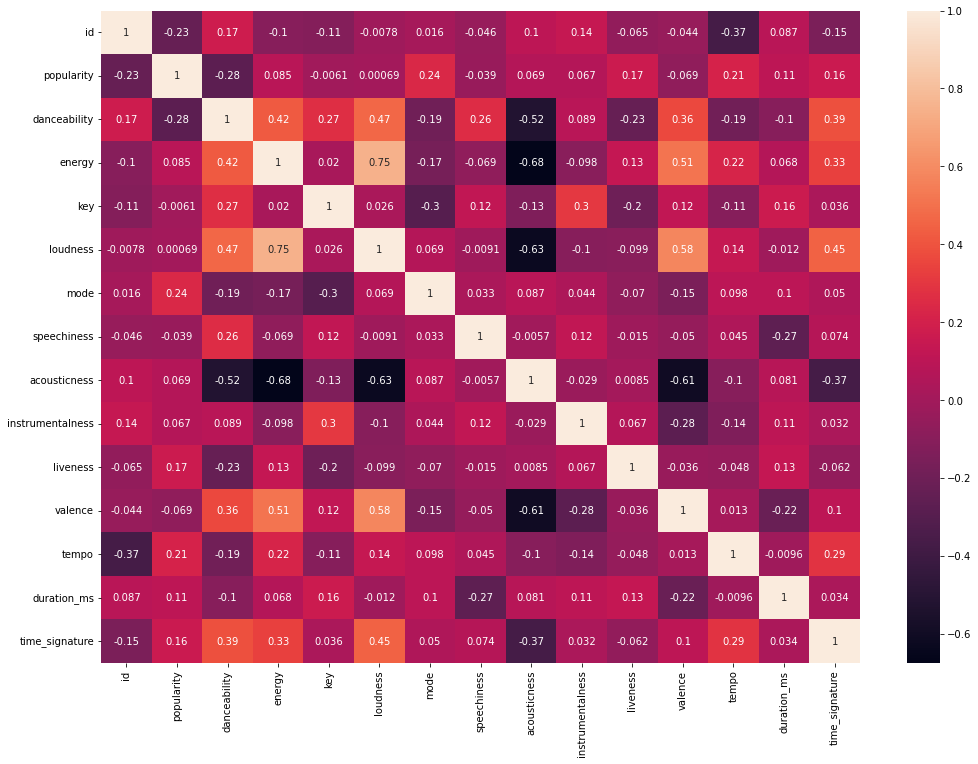

In [40]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Skewness

- Checking of skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.

- 1 = Left skewed
- 0 = Normal distribution
- 1 = Right skewed

In [41]:
df.skew()

id                  0.000000
popularity         -1.390988
danceability       -0.717266
energy             -0.388784
key                 0.058259
loudness           -0.690274
mode               -0.509877
speechiness         2.023983
acousticness        0.929840
instrumentalness    4.685003
liveness            1.721014
valence            -0.135697
tempo               0.446869
duration_ms         0.414452
time_signature     -4.841323
dtype: float64

- Seems some columns are skewed a lot, removal of the outliers will normalize a data bit.
- Let's visualize how much data are skewed using kdeplot before outlier treatment.

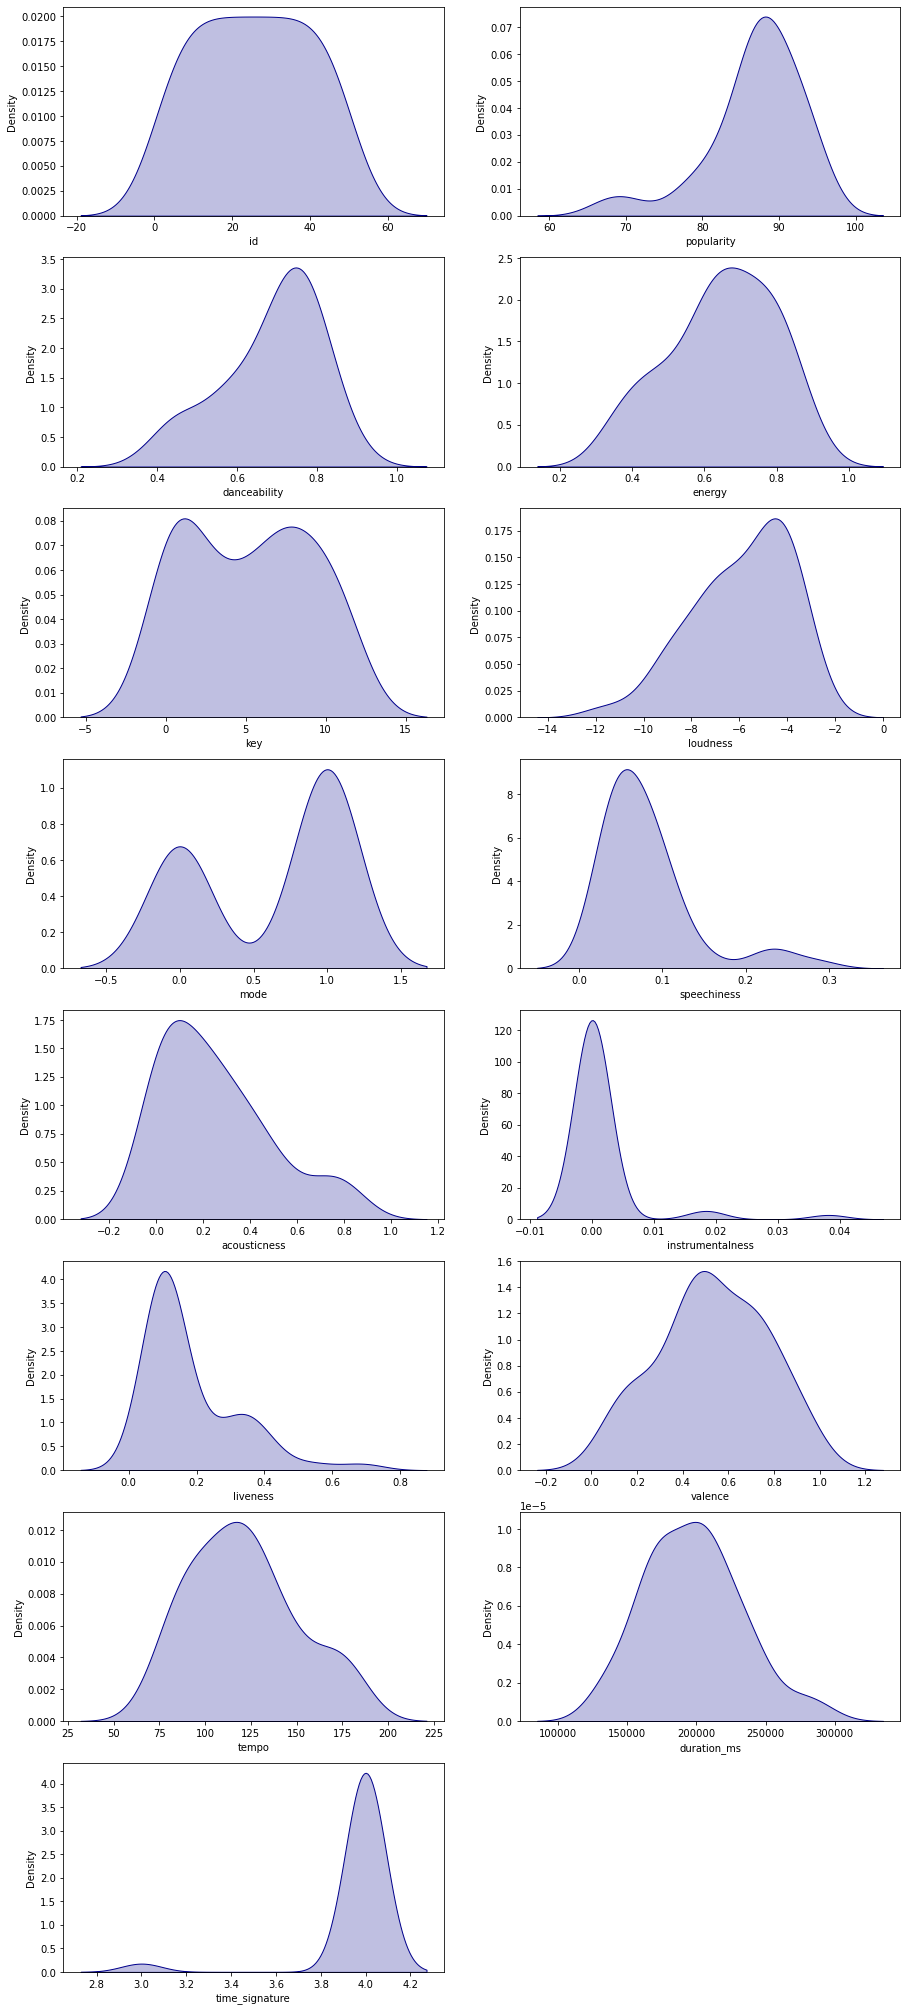

In [42]:
plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

## Outlier

- Since the data are skewed, so let's visualize the outliers.

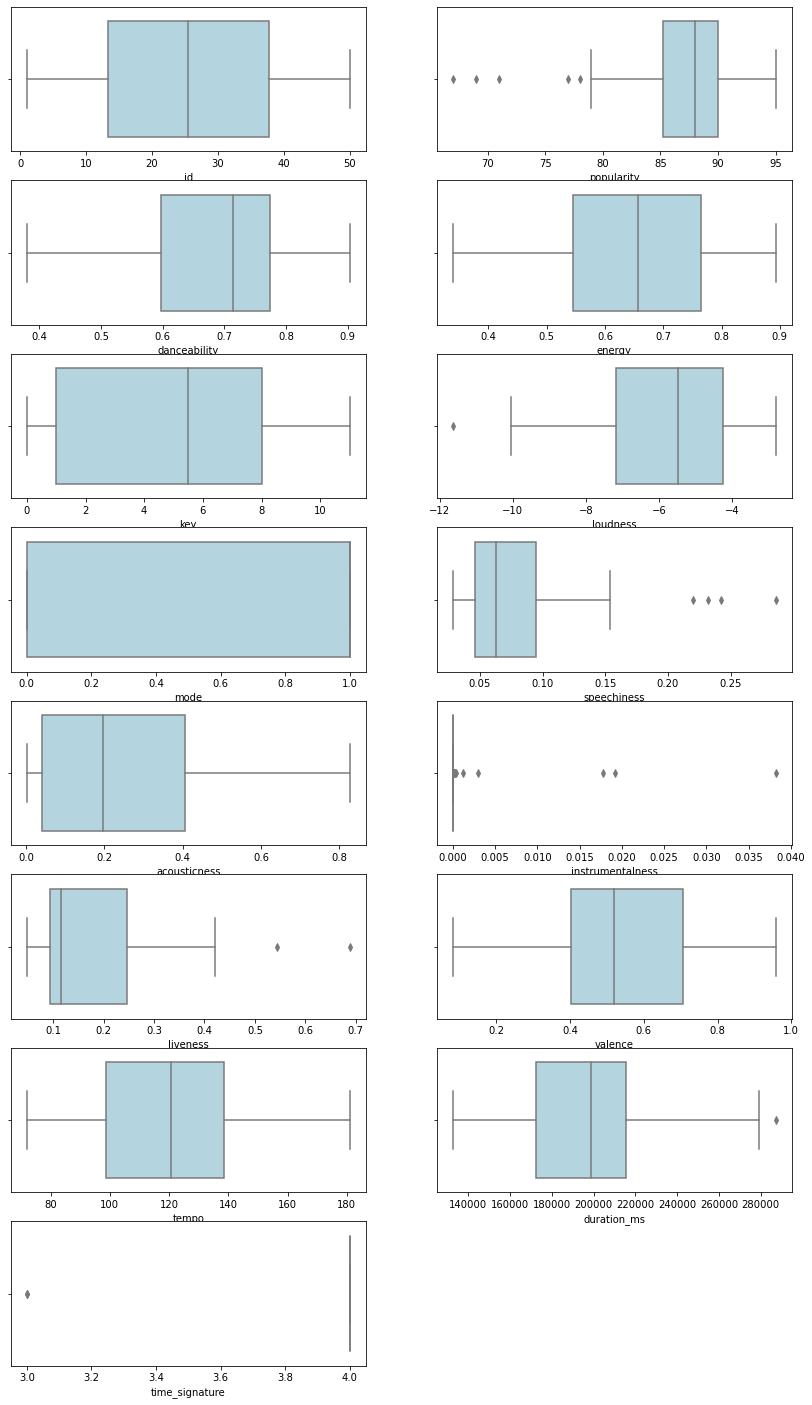

In [43]:
plt.figure(figsize=(14,25))
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(8,2,j)
    sns.boxplot(df[i],color='lightblue')
plt.show()

## Outlier removal

In [44]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

id     artist_name                              track_name  \
0   1  Olivia Rodrigo                         drivers license   
2   3   The Kid LAROI               STAY (with Justin Bieber)   
3   4  Olivia Rodrigo                                good 4 u   
4   5        Dua Lipa               Levitating (feat. DaBaby)   
5   6   Justin Bieber  Peaches (feat. Daniel Caesar & Giveon)   

                 track_id  popularity  danceability  energy  key  loudness  \
0  5wANPM4fQCJwkGd4rN57mH          92         0.561   0.431   10    -8.810   
2  5PjdY0CKGZdEuoNab3yDmX          92         0.591   0.764    1    -5.484   
3  4ZtFanR9U6ndgddUvNcjcG          95         0.563   0.664    9    -5.044   
4  5nujrmhLynf4yMoMtj8AQF          89         0.702   0.825    6    -3.787   
5  4iJyoBOLtHqaGxP12qzhQI          90         0.677   0.696    0    -6.181   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0578       0.76800          0.000014    0.1060    0.137   
2     1       0.0483       0.03830          0.000000    0.1030    0.478   
3     1       0.1540       0.33500          0.000000    0.0849    0.688   
4     0       0.0601       0.00883          0.000000    0.0674    0.915   
5     1       0.1190       0.32100          0.000000    0.4200    0.464   

     tempo  duration_ms  time_signature  
0  143.875       242013               4  
2  169.928       141806               4  
3  166.928       178147               4  
4  102.977       203064               4  
5   90.030       198082               4

## Checking for normal distribution after outlier treatment.

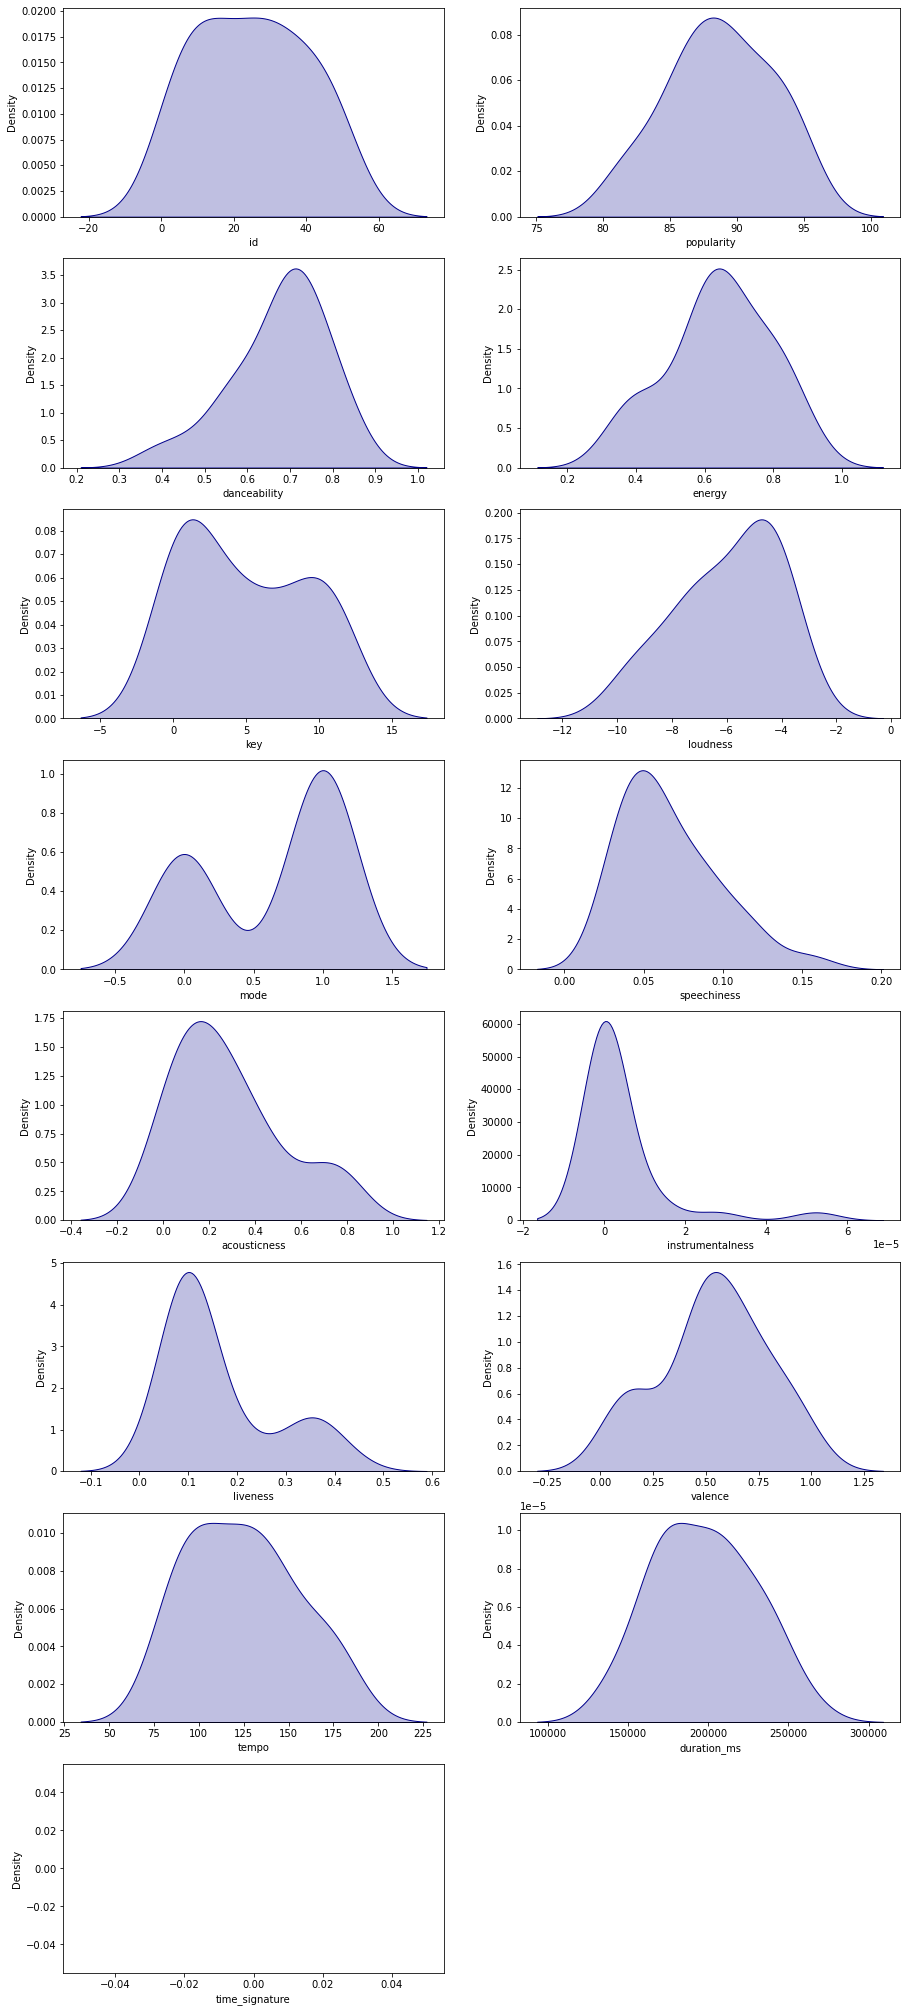

In [45]:
plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

## Still some columns are skewed even after outlier removal and skewness can be normalized during ML part.

In [46]:
df.skew()

id                  0.093438
popularity         -0.162323
danceability       -0.826365
energy             -0.311109
key                 0.284823
loudness           -0.546532
mode               -0.582933
speechiness         1.032372
acousticness        0.869535
instrumentalness    3.598703
liveness            1.237493
valence            -0.258110
tempo               0.320553
duration_ms         0.134072
time_signature      0.000000
dtype: float64

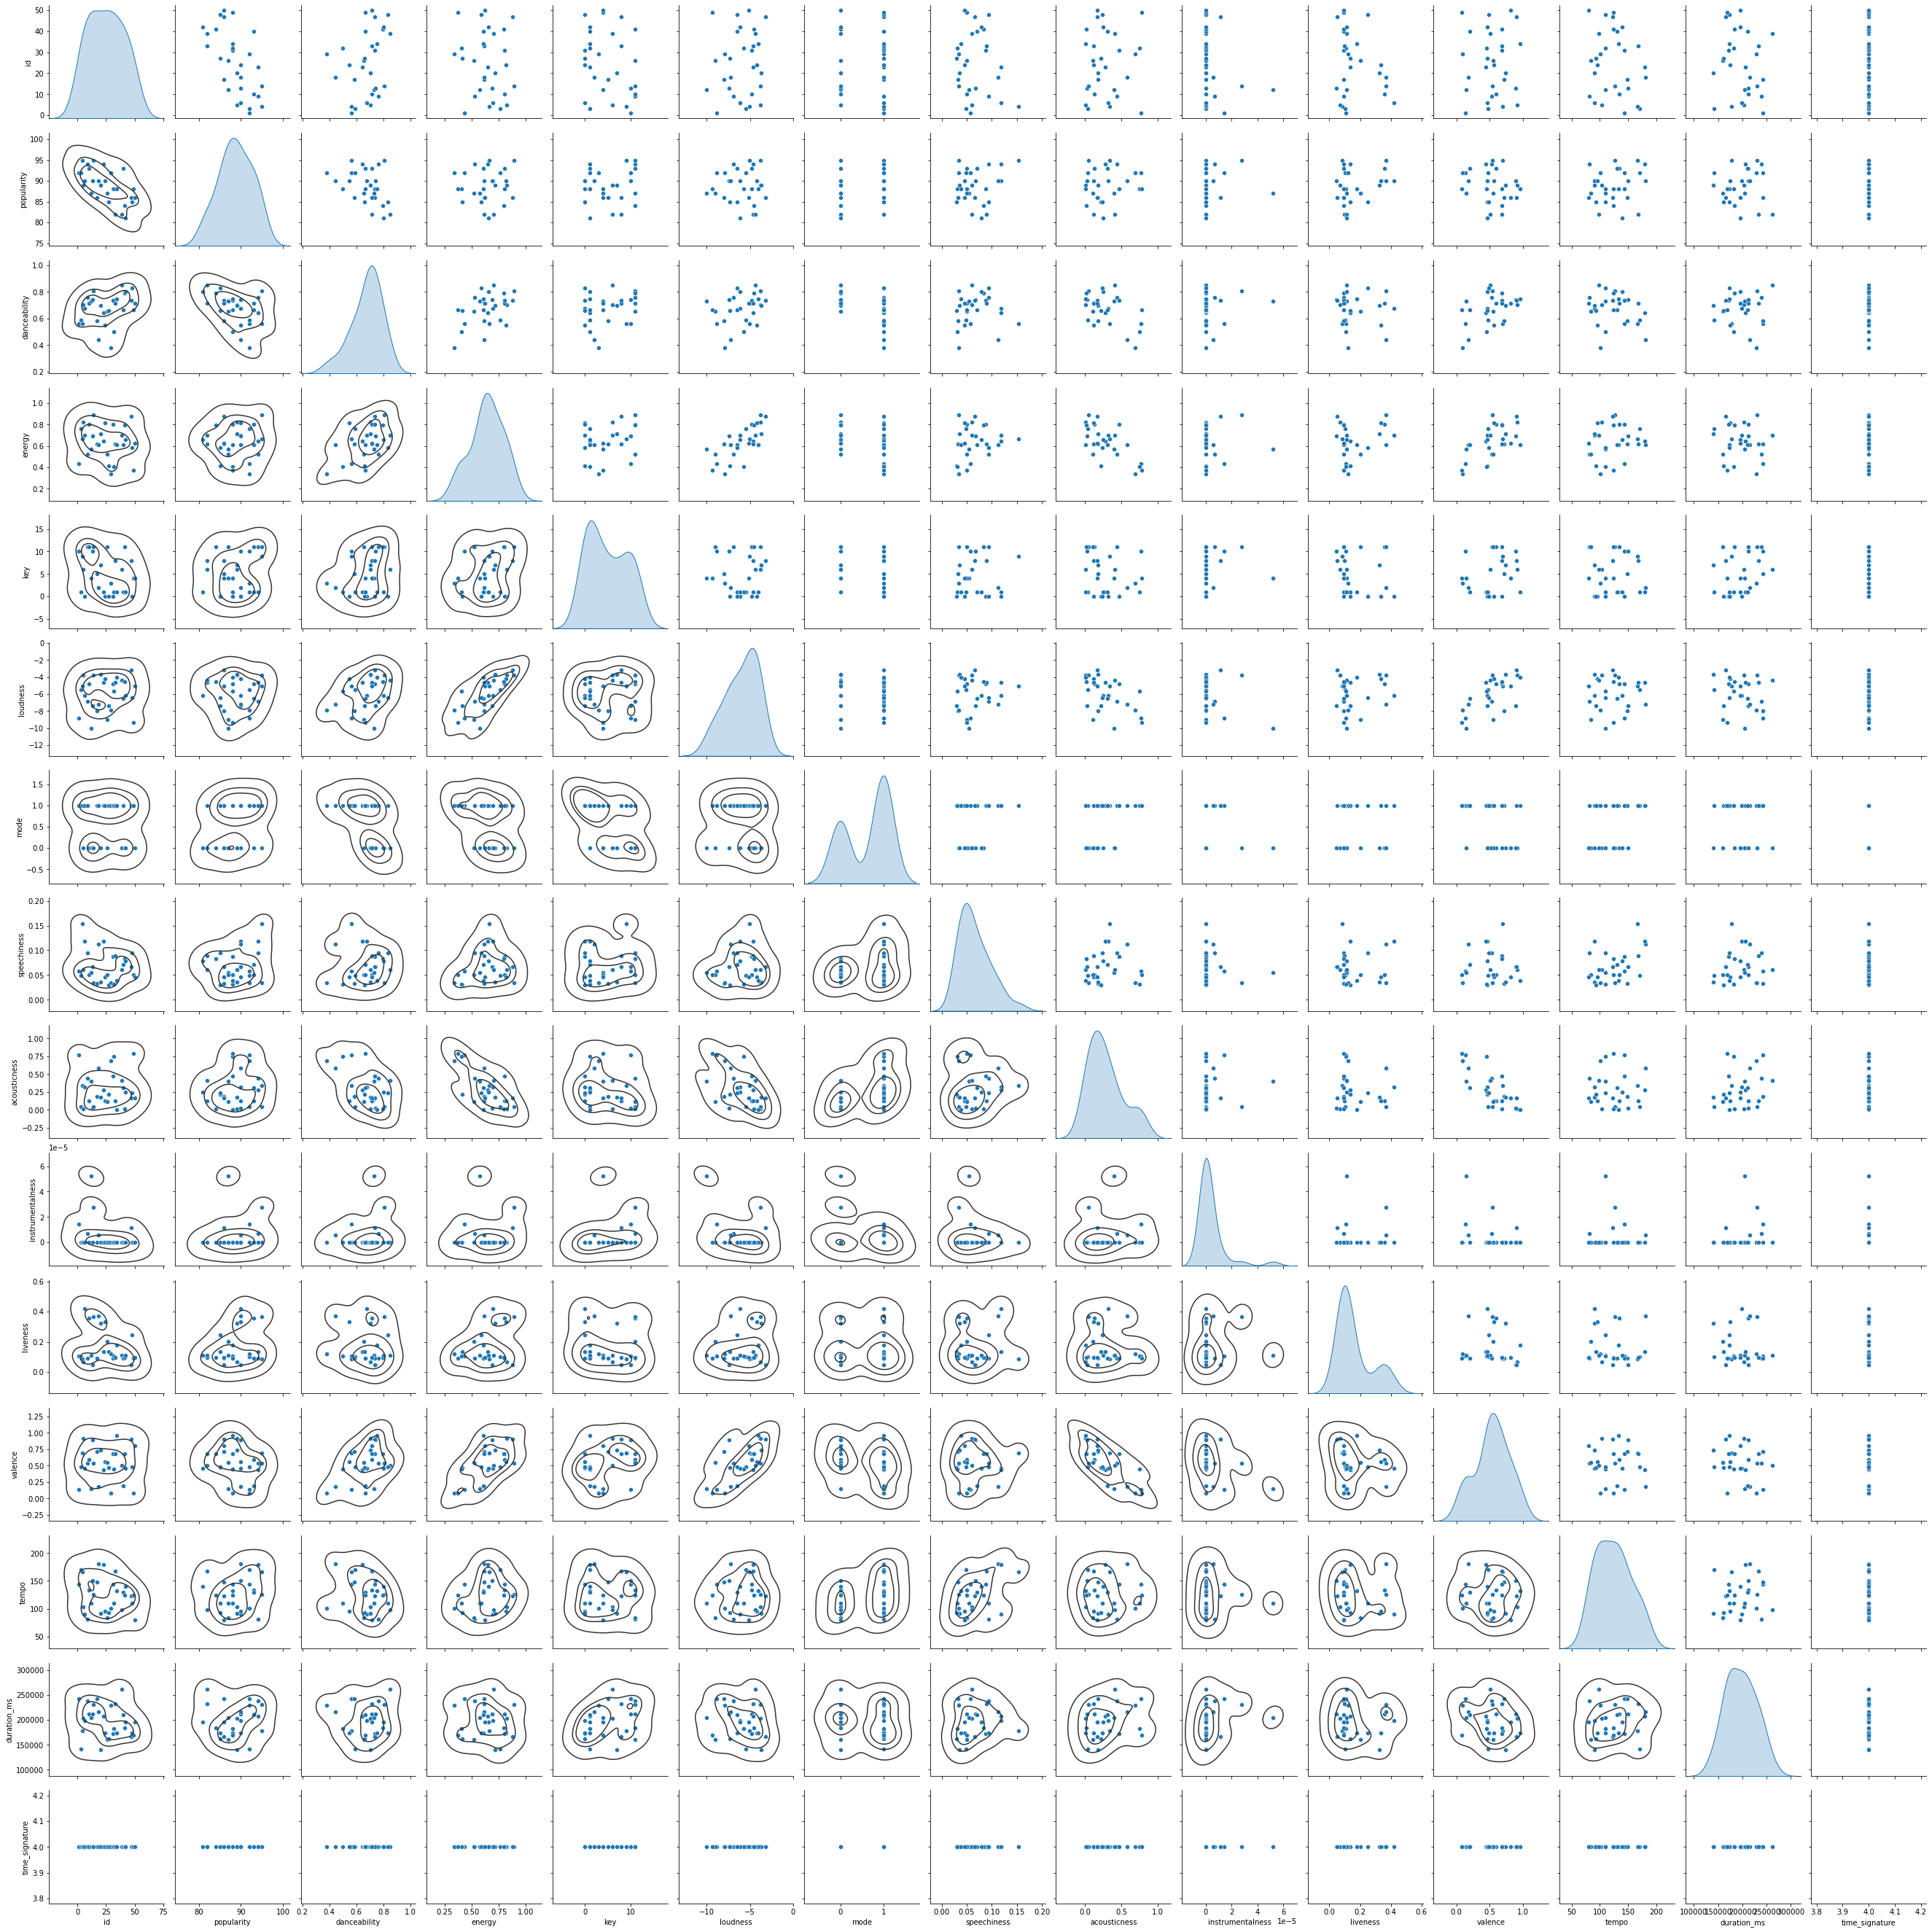

In [47]:
sns.pairplot(df, diag_kind="kde").map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

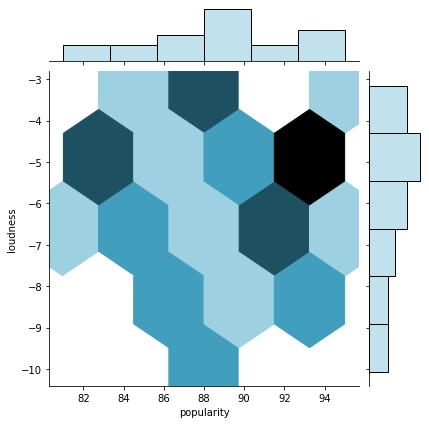

In [48]:
sns.jointplot(df.popularity,df.loudness,kind = 'hex',color='lightblue')
plt.show()

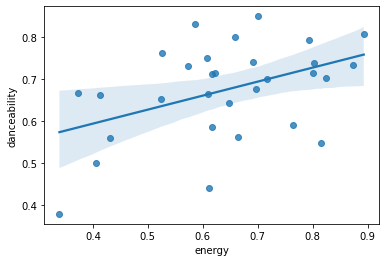

In [49]:
sns.regplot(x = 'energy',y = 'danceability',data=df)
plt.show()

In [50]:
from wordcloud import WordCloud

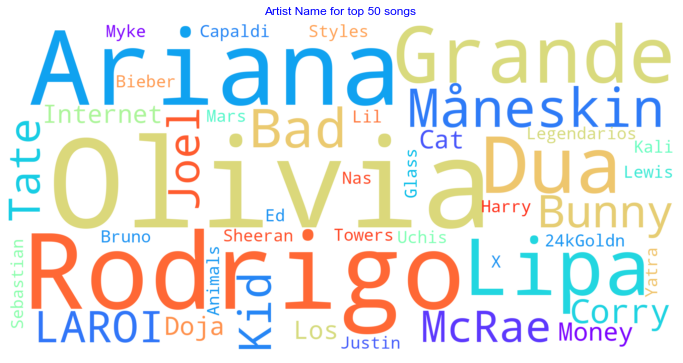

In [51]:
plt.style.use('seaborn')
wrds1 = df["artist_name"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

## Top 10 Artist of 2021

In [50]:
df['Count']=1
df_artist=df.groupby('artist_name')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_artist.head(10)

artist_name  Count
18   Olivia Rodrigo      4
21    The Kid LAROI      2
2         Bad Bunny      2
5          Dua Lipa      2
17         Måneskin      2
1     Ariana Grande      2
13    Lewis Capaldi      1
20       Tate McRae      1
19  Sebastian Yatra      1
16      Myke Towers      1

In [51]:
df_artist

artist_name  Count
18   Olivia Rodrigo      4
21    The Kid LAROI      2
2         Bad Bunny      2
5          Dua Lipa      2
17         Måneskin      2
1     Ariana Grande      2
13    Lewis Capaldi      1
20       Tate McRae      1
19  Sebastian Yatra      1
16      Myke Towers      1
15  Los Legendarios      1
14        Lil Nas X      1
0          24kGoldn      1
12       Kali Uchis      1
10       Joel Corry      1
9    Internet Money      1
8      Harry Styles      1
7     Glass Animals      1
6        Ed Sheeran      1
4          Doja Cat      1
3        Bruno Mars      1
11    Justin Bieber      1

In [52]:
import plotly.express as px

In [53]:
fig=px.pie(df_artist.head(10),values='Count',names='artist_name',hole=0.4)

fig.update_layout(title='Top 10 Artist of 2021',font_size=15,title_x=0.45,
                  annotations=[dict(text='Artist',font_size=25, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## Top 10 Track of 2021

In [54]:
df_top_tracks=df.sort_values(by='popularity',ascending=False).head(10).reset_index(drop=True)
df_top_tracks.index=df_top_tracks.index + 1
df_top_tracks

id     artist_name                         track_name  \
1   14      Ed Sheeran                         Bad Habits   
2    4  Olivia Rodrigo                           good 4 u   
3    9   Glass Animals                         Heat Waves   
4   23       Bad Bunny                           Yonaguni   
5   40        Doja Cat                       Need to Know   
6   10        Måneskin                            Beggin'   
7   29  Olivia Rodrigo                            traitor   
8    3   The Kid LAROI          STAY (with Justin Bieber)   
9    1  Olivia Rodrigo                    drivers license   
10  13       Lil Nas X  INDUSTRY BABY (feat. Jack Harlow)   

                  track_id  popularity  danceability  energy  key  loudness  \
1   3rmo8F54jFF8OgYsqTxm5d          95         0.807   0.893   11    -3.745   
2   4ZtFanR9U6ndgddUvNcjcG          95         0.563   0.664    9    -5.044   
3   02MWAaffLxlfxAUY7c5dvx          94         0.761   0.525   11    -6.900   
4   2JPLbjOn0wPCngEot2STUS          94         0.644   0.648    1    -4.601   
5   3Vi5XqYrmQgOYBajMWSvCi          93         0.664   0.609    1    -6.509   
6   3Wrjm47oTz2sjIgck11l5e          93         0.714   0.800   11    -4.808   
7   5CZ40GBx1sQ9agT82CLQCT          92         0.380   0.339    3    -7.885   
8   5PjdY0CKGZdEuoNab3yDmX          92         0.591   0.764    1    -5.484   
9   5wANPM4fQCJwkGd4rN57mH          92         0.561   0.431   10    -8.810   
10  5Z9KJZvQzH6PFmb8SNkxuk          90         0.741   0.691   10    -7.395   

    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
1      0       0.0347        0.0451          0.000028    0.3660   0.5370   
2      1       0.1540        0.3350          0.000000    0.0849   0.6880   
3      1       0.0944        0.4400          0.000007    0.0921   0.5310   
4      1       0.1180        0.2760          0.000000    0.1350   0.4400   
5      1       0.0707        0.3040          0.000000    0.0926   0.1940   
6      0       0.0504        0.1270          0.000000    0.3590   0.5890   
7      1       0.0338        0.6910          0.000000    0.1200   0.0849   
8      1       0.0483        0.0383          0.000000    0.1030   0.4780   
9      1       0.0578        0.7680          0.000014    0.1060   0.1370   
10     0       0.0672        0.0221          0.000000    0.0476   0.8920   

      tempo  duration_ms  time_signature  Count  
1   126.011       230747               4      1  
2   166.928       178147               4      1  
3    80.870       238805               4      1  
4   179.951       206710               4      1  
5   130.041       210560               4      1  
6   134.002       211560               4      1  
7   100.607       229227               4      1  
8   169.928       141806               4      1  
9   143.875       242013               4      1  
10  150.087       212353               4      1

In [55]:
fig=px.pie(df_top_tracks,values='popularity',
           names=['good 4 u','Woman','Bad Habits','Yonaguni','Heat Waves','Blinding Lights','Beggin','Need to Know',
                  'drivers license','STAY (with Justin Bieber)'],hole=0.45)

fig.update_layout(title='Top 10 Tracks of 2021',font_size=15,title_x=0.45,
                  annotations=[dict(text='Tracks',font_size=25, showarrow=False,height=800,width=700)])

fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## Pie-distribution of Key with different Audio Characteristics

In [56]:
fig=px.pie(df,values='valence',names='key',hole=0.35)

fig.update_layout(title='The distribution of valence and key',font_size=15,title_x=0.45,
                  annotations=[dict(text='valance',font_size=25,showarrow=False,height=800,width=700)])

fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [57]:
fig=px.pie(df,values='acousticness',names='key',hole=0.55)

fig.update_layout(title='The distribution of acousticness and key',font_size=15,title_x=0.45,
                  annotations=[dict(text='acousticness',font_size=25, showarrow=False,height=800,width=700)])

fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [58]:
fig=px.pie(df,values='speechiness',names='key',hole=0.55)

fig.update_layout(title='The distribution of speechiness and key ',font_size=15,title_x=0.45,
                  annotations=[dict(text='speechiness',font_size=25, showarrow=False,height=800,width=700)])

fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

## Scatter distribution of Popularity with different Audio Characteristics

In [59]:
fig = px.scatter(df, x="popularity", y="energy")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Energy effect on popularity')
fig.show()

In [60]:
fig = px.scatter(df, x="popularity", y="loudness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Loudness effect on popularity')
fig.show()

In [61]:
fig = px.scatter(df, x="popularity", y="speechiness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Speechiness effect on popularity')
fig.show()

In [62]:
fig = px.scatter(df, x="popularity", y="acousticness")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Acousticness effect on popularity')
fig.show()

In [63]:
fig = px.scatter(df, x="popularity", y="tempo")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Tempo effect on popularity')
fig.show()

In [64]:
fig = px.scatter(df, x="popularity", y="valence")
fig.update_layout(legend_orientation='h',
                  legend=dict(x=0, y=1, traceorder='normal'),
                  title='Valence effect on popularity')
fig.show()

In [65]:
df.drop(["id","artist_name","track_name","track_id"],axis = 1,inplace = True)

# 4. Machine Learning

## Importing libraries

- For spliting the data
- For creating the model
- For ploting the visualization of model perfectness

## Train test split

- test_size = 0.25 so that data is split into 75% and 25%
- random_state is applied so that each time we run we get the same result

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x = df.drop(["mode"],axis=1)
x

popularity  danceability  energy  key  loudness  speechiness  \
0           92         0.561   0.431   10    -8.810       0.0578   
2           92         0.591   0.764    1    -5.484       0.0483   
3           95         0.563   0.664    9    -5.044       0.1540   
4           89         0.702   0.825    6    -3.787       0.0601   
5           90         0.677   0.696    0    -6.181       0.1190   
8           94         0.761   0.525   11    -6.900       0.0944   
9           93         0.714   0.800   11    -4.808       0.0504   
11          87         0.731   0.573    4   -10.059       0.0544   
12          90         0.741   0.691   10    -7.395       0.0672   
13          95         0.807   0.893   11    -3.745       0.0347   
16          86         0.586   0.616    5    -7.964       0.0324   
17          90         0.442   0.612    2    -7.222       0.1120   
19          89         0.701   0.716    7    -3.671       0.0361   
22          94         0.644   0.648    1    -4.601       0.1180   
23          90         0.548   0.816    0    -4.209       0.0465   
25          87         0.653   0.524   11    -9.016       0.0502   
26          85         0.662   0.413    0    -7.357       0.0299   
28          92         0.380   0.339    3    -7.885       0.0338   
30          88         0.737   0.802    0    -4.771       0.0878   
31          88         0.501   0.405    1    -5.679       0.0319   
32          82         0.713   0.617    8    -4.637       0.0887   
33          88         0.750   0.608    1    -4.008       0.0387   
38          82         0.849   0.701    6    -4.407       0.0600   
39          93         0.664   0.609    1    -6.509       0.0707   
40          84         0.793   0.793   11    -4.521       0.0830   
41          81         0.800   0.658    1    -6.142       0.0790   
46          86         0.734   0.874    8    -3.158       0.0662   
47          85         0.830   0.585    0    -6.476       0.0940   
48          88         0.667   0.373    4    -9.389       0.0500   
49          86         0.715   0.622    4    -5.102       0.0460   

    acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.76800          0.000014    0.1060   0.1370  143.875       242013   
2        0.03830          0.000000    0.1030   0.4780  169.928       141806   
3        0.33500          0.000000    0.0849   0.6880  166.928       178147   
4        0.00883          0.000000    0.0674   0.9150  102.977       203064   
5        0.32100          0.000000    0.4200   0.4640   90.030       198082   
8        0.44000          0.000007    0.0921   0.5310   80.870       238805   
9        0.12700          0.000000    0.3590   0.5890  134.002       211560   
11       0.40100          0.000052    0.1130   0.1450  109.928       205090   
12       0.02210          0.000000    0.0476   0.8920  150.087       212353   
13       0.04510          0.000028    0.3660   0.5370  126.011       230747   
16       0.18200          0.000000    0.0927   0.7190  148.088       242096   
17       0.58400          0.000006    0.3700   0.1780  180.917       215507   
19       0.17400          0.000000    0.3240   0.7320   91.007       140533   
22       0.27600          0.000000    0.1350   0.4400  179.951       206710   
23       0.12200          0.000000    0.3350   0.5570   95.390       174000   
25       0.11200          0.000000    0.2030   0.5530   83.970       160191   
26       0.21300          0.000000    0.1340   0.4670   93.005       161385   
28       0.69100          0.000000    0.1200   0.0849  100.607       229227   
30       0.46800          0.000000    0.0931   0.6820  144.015       172325   
31       0.75100          0.000000    0.1050   0.4460  109.891       182161   
32       0.12200          0.000000    0.0962   0.6820  168.021       232853   
33       0.00165          0.000000    0.1780   0.9580  132.507       173347   
38       0.40700          0.000000    0.1120   0.5050   98.005       261667   

In [74]:
y = df["mode"]

In [75]:
print(y)

0     1
2     1
3     1
4     0
5     1
8     1
9     0
11    0
12    0
13    0
16    1
17    1
19    0
22    1
23    1
25    0
26    1
28    1
30    1
31    1
32    1
33    1
38    0
39    1
40    0
41    0
46    1
47    1
48    1
49    0
Name: mode, dtype: int64


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 14)
(8, 14)
(22,)
(8,)


## a.Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
model = LogisticRegression()

In [97]:
model.fit(x_train,y_train)

LogisticRegression()

In [98]:
y_predict = model.predict(x_test)
y_predict

array([0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [99]:
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [100]:
model.score(x_train,y_train)

0.6363636363636364

In [101]:
model.score(x_test,y_test)

0.5

In [102]:
accuracy_score(y_test,y_predict)*100

50.0

In [103]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_predict})

In [104]:
df1

Actual  Predicted
38       0          0
0        1          1
12       0          1
5        1          0
9        0          1
22       1          1
26       1          1
41       0          1

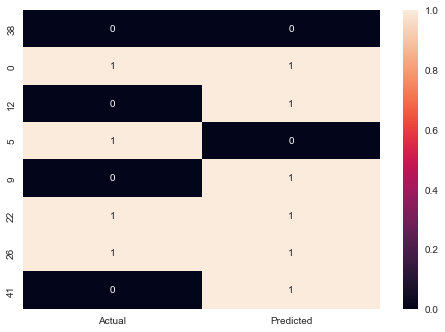

In [105]:
sns.heatmap(df1,annot = True)  # annot=True is used for reflecting the values
plt.show()

## b.Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
from sklearn.metrics import accuracy_score

In [108]:
model1 = DecisionTreeClassifier()

In [109]:
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
y_predict1 = model1.predict(x_test)
y_predict1

array([1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [111]:
model1.score(x_train,y_train)

1.0

In [112]:
model1.score(x_test,y_test)

0.75

In [113]:
accuracy_score(y_test,y_predict1)*100

75.0

In [114]:
df2 = pd.DataFrame({"Actual":y_test,"Predicted":y_predict1})

In [115]:
df2

Actual  Predicted
38       0          1
0        1          1
12       0          0
5        1          1
9        0          0
22       1          1
26       1          1
41       0          1

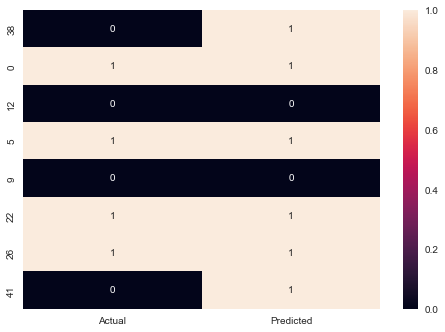

In [116]:
sns.heatmap(df2,annot = True)  # annot=True is used for reflecting the values
plt.show()

## c.Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
model2 = RandomForestClassifier()

In [120]:
model2.fit(x_train,y_train)

RandomForestClassifier()

In [121]:
y_predict2 = model2.predict(x_test)
y_predict2

array([1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [122]:
model2.score(x_train,y_train)

1.0

In [123]:
model2.score(x_test,y_test)

0.625

In [124]:
accuracy_score(y_test,y_predict2)*100

62.5

In [125]:
df3 = pd.DataFrame({"Actual":y_test,"Predicted":y_predict2})

In [126]:
df3

Actual  Predicted
38       0          1
0        1          1
12       0          1
5        1          1
9        0          0
22       1          1
26       1          1
41       0          1

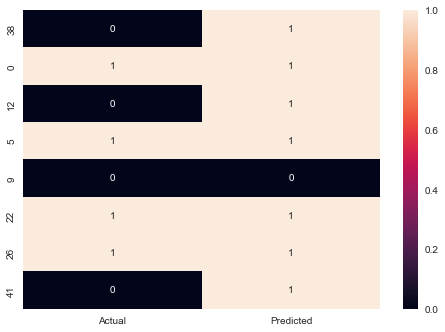

In [127]:
sns.heatmap(df3,annot = True)  # annot=True is used for reflecting the values
plt.show()

## d.K Neighbour Classifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
model3=KNeighborsClassifier()

In [131]:
model3.fit(x_train,y_train)

KNeighborsClassifier()

In [132]:
y_predict3 = model3.predict(x_test)
y_predict3

array([1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [133]:
model3.score(x_train,y_train)

0.7727272727272727

In [134]:
model3.score(x_test,y_test)

0.5

In [135]:
accuracy_score(y_test,y_predict3)*100

50.0

In [136]:
df4 = pd.DataFrame({"Actual":y_test,"Predicted":y_predict3})

In [137]:
df4

Actual  Predicted
38       0          1
0        1          1
12       0          1
5        1          0
9        0          0
22       1          0
26       1          1
41       0          0

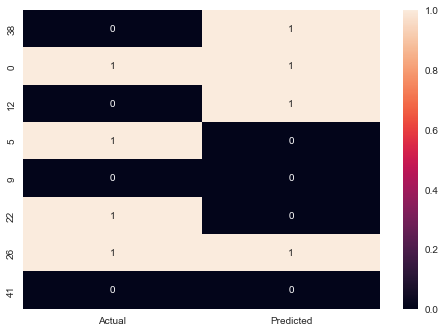

In [138]:
sns.heatmap(df4,annot = True)  # annot=True is used for reflecting the values
plt.show()

## e.Support Vector Machine

In [139]:
from sklearn.svm import SVC

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
model4= SVC()

In [142]:
model4.fit(x_train,y_train)

SVC()

In [143]:
y_predict4 = model4.predict(x_test)
y_predict4

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [144]:
model4.score(x_train,y_train)

0.6818181818181818

In [145]:
model4.score(x_test,y_test)

0.5

In [146]:
accuracy_score(y_test,y_predict4)*100

50.0

In [147]:
df5 = pd.DataFrame({"Actual":y_test,"Predicted":y_predict4})

In [148]:
df5

Actual  Predicted
38       0          1
0        1          1
12       0          1
5        1          1
9        0          1
22       1          1
26       1          1
41       0          1

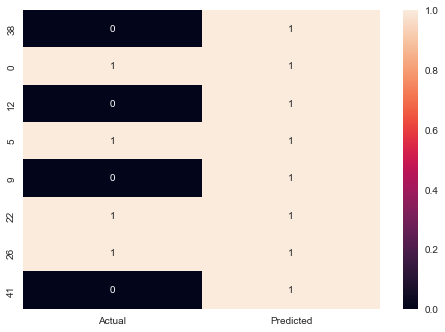

In [149]:
sns.heatmap(df5,annot = True)  # annot=True is used for reflecting the values
plt.show()

## f.Naive's Baye's Theorem

In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
model5=GaussianNB()

In [152]:
model5.fit(x_train,y_train)

GaussianNB()

In [153]:
model5.score(x_test,y_test)

0.625

In [154]:
model5.score(x_train,y_train)

0.8636363636363636

In [155]:
y_predict5 = model5.predict(x_test)

In [156]:
y_predict5

array([0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [157]:
model5.score(x_train,y_train)

0.8636363636363636

In [158]:
model5.score(x_test,y_test)

0.625

In [159]:
accuracy_score(y_test,y_predict5)*100

62.5

In [160]:
df6 = pd.DataFrame({"Actual":y_test,"Predicted":y_predict5})

In [161]:
df6

Actual  Predicted
38       0          0
0        1          1
12       0          1
5        1          1
9        0          1
22       1          1
26       1          1
41       0          1

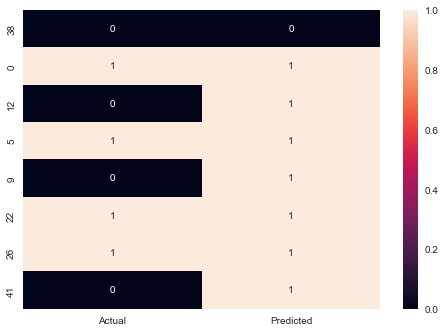

In [162]:
sns.heatmap(df6,annot = True)  # annot=True is used for reflecting the values
plt.show()

## Confusion Matrix for Logistic Regression

In [163]:
from sklearn.metrics import confusion_matrix

In [164]:
from sklearn.metrics import plot_confusion_matrix

In [165]:
perform = confusion_matrix(y_test,y_predict)
perform

array([[1, 3],
       [1, 3]], dtype=int64)

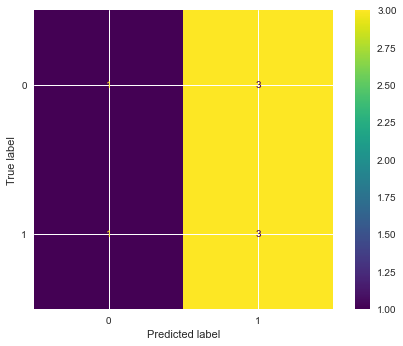

In [166]:
plot_confusion_matrix(model,x_test,y_test)  # logistic regression
plt.show()

## Confusion Matrix for Decision Tree

In [167]:
perform1 = confusion_matrix(y_test,y_predict1)
perform1

array([[2, 2],
       [0, 4]], dtype=int64)

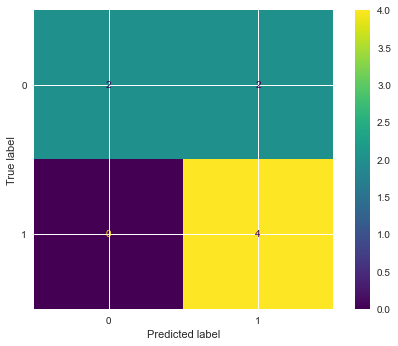

In [168]:
plot_confusion_matrix(model1,x_test,y_test)  #
plt.show()

## Confusion Matrix for Random Forest Classifier

In [169]:
perform2 = confusion_matrix(y_test,y_predict2)
perform2

array([[1, 3],
       [0, 4]], dtype=int64)

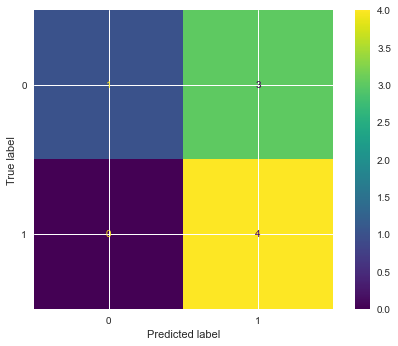

In [170]:
plot_confusion_matrix(model2,x_test,y_test)
plt.show()

## Confusion Matrix for K Neighbour Classifier

In [171]:
perform3 = confusion_matrix(y_test,y_predict3)
perform3

array([[2, 2],
       [2, 2]], dtype=int64)

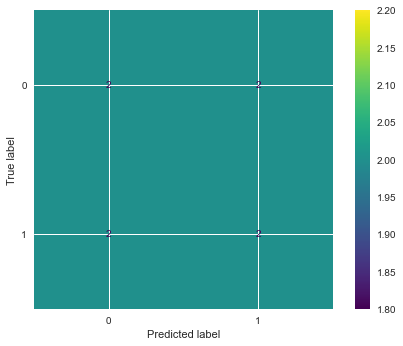

In [172]:
plot_confusion_matrix(model3,x_test,y_test)
plt.show()

## Confusion Matrix for Support Vector Machine

In [173]:
perform4 = confusion_matrix(y_test,y_predict4)
perform4

array([[0, 4],
       [0, 4]], dtype=int64)

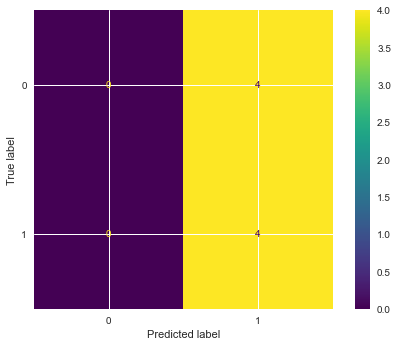

In [174]:
plot_confusion_matrix(model4,x_test,y_test)
plt.show()

## Confusion Matrix for Naive's Baye's Theorem

In [175]:
perform5 = confusion_matrix(y_test,y_predict5)
perform5

array([[1, 3],
       [0, 4]], dtype=int64)

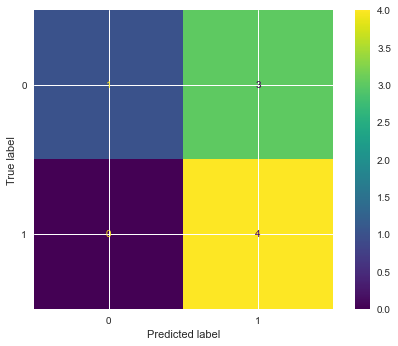

In [176]:
plot_confusion_matrix(model5,x_test,y_test)
plt.show()

## Observation

- Logistic Regression - 50%
- Random Forest - 62%
- Decision Tree - 75%
- KNN - 50%
- SVM - 50%
- Naive Bayes - 62.5%
- So we could find that Decision Tree and Naive bayes shows best accuracy.

# Conclusion

- I had a working hypothesis that once an artist is well known enough, they can disregard the current market trend and produce whatever they would like to. The fame their name carries would push the music into popularity. Even if they only roughly follow the trend, their household name would help push the song to the charts. But over time as I have seen my favorite artists come and go in the charts, I believe that is not that case. Which is what led me to this project.

- Going back to the hypothesis, Olivia Rodrigo was considerably an unknown artist prior to this year and yet she still exploded, where as Doja Cat has been sticking to what works and constantly releasing great songs. Judging from the case study, I believe once an artist is known, sticking to the trend does not matter much - Lil Nas X and Bad Bunny only roughly matched the recommended criteria.

- Ultimately, my recommendation to my audience regarding a 'viral template' is that I believe that this recommendation will serve as a good starting point to branch out from, it is generally what the public consumes. I would recommend a song with high danceability (0.55-0.85 trending up), low energy (0.5-0.85 trending down), written in the B,C,G#, or C# major key. Although the tempo is trending down, because of current situations and people needing uplifting beats, I can confidently recommend keeping the tempo in the 75-150 bpm window.

- However if any singer/producer/song writer feels strongly about the creative direction they are going that passion would ultimately drive them to success.